| Title   | Detail |
|---------|-------------------------|
| Project | CreditCard Users Churn Prediction |
| Submission type |  File Upload |
| Due Date |  May 08, 11:00 AM |
| Total Score |  60 |
| Available from |  Apr 21, 9:30 PM |

#### **Description**
##### **Background and Context**
Thera Bank recently saw a steep decline in the number of users of their credit card. Credit cards are a good source of income for banks because of different kinds of fees charged by banks like annual fees, balance transfer fees, cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage while others are charged under specified circumstances.
Customers’ leaving credit cards services would lead the bank to lost profit, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and their reasons for the same – so that the bank could improve upon those areas.
You, as a Data scientist at Thera Bank, need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards.

**Objective**
1.	Explore and visualize the dataset.
2.	Build a classification model to predict if the customer is going to churn or not
3.	Optimize the model using appropriate techniques
4.	Generate a set of insights and recommendations that will help the bank

**Data Dictionary**
* **CLIENTNUM**: Client number. Unique identifier for the customer holding the account
* **Attrition_Flag**: Internal event (customer activity) variable - if the account is closed then 1 else 0
* **Customer_Age**: Age in Years
* **Gender**: Gender of the account holder
* **Dependent_count**: Number of dependents
* **Education_Level**: Educational Qualification of the account holder
* **Marital_Status**: Marital Status of the account holder
* **Income_Category**: Annual Income Category of the account holder
* **Card_Category**: Type of Card
* **Months_on_book**: Period of relationship with the bank
* **Total_Relationship_Count**: Total no. of products held by the customer
* **Months_Inactive_12_mon**: No. of months inactive in the last 12 months
* **Contacts_Count_12_mon**: No. of Contacts in the last 12 months
* **Credit_Limit**: Credit Limit on the Credit Card
* **Total_Revolving_Bal**: Total Revolving Balance on the Credit Card
* **Avg_Open_To_Buy**: Open to Buy Credit Line (Average of last 12 months)
* **Total_Amt_Chng_Q4_Q1**: Change in Transaction Amount (Q4 over Q1)
* **Total_Trans_Amt**: Total Transaction Amount (Last 12 months)
* **Total_Trans_Ct**: Total Transaction Count (Last 12 months)
* **Total_Ct_Chng_Q4_Q1**: Change in Transaction Count (Q4 over Q1)
* **Avg_Utilization_Ratio**: Average Card Utilization Ratio

**Best Practices for Notebook:**
* The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
* The notebook should be run from start to finish in a sequential manner before submission.
* It is preferable to remove all warnings and errors before submission.

**Submission Guidelines:**
1.	The submission should be: well commented Jupyter notebook (format - .HTML and .ipynb)
2.	Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks
3.	Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
4.	Submission will not be evaluated if,
  1.	it is submitted post-deadline, or,
  2.	more than 2 files are submitted
<br>
<br>
Happy Learning!!
<br>

In [208]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
import statistics
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline
import eli5

%matplotlib inline

In [2]:
# other global options
np.set_printoptions(suppress = True)  # To avoid unnecessary engineering notation use later.
warnings.filterwarnings("ignore")
plt.rcParams["axes.formatter.useoffset"] = False
pd.options.display.html.use_mathjax = False # Removes '$ sign as italics' issue.
pd.options.display.max_columns = None # To stop suppressing the middle columns when viewing a wide dataframe.

In [3]:
#import dataset
input_data = "./BankChurners.csv"
df = pd.read_csv(input_data)
df.head().style.hide_index()

In [4]:
# shape
df.shape

(10127, 21)

## Perform an Exploratory Data Analysis on the data - 6 pts

### Univariate analysis

In [5]:
# check datatype
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [6]:
# looking for na values
df.isna().sum().sort_values()

CLIENTNUM                   0
Total_Trans_Ct              0
Total_Trans_Amt             0
Total_Amt_Chng_Q4_Q1        0
Avg_Open_To_Buy             0
Total_Revolving_Bal         0
Credit_Limit                0
Contacts_Count_12_mon       0
Months_Inactive_12_mon      0
Total_Ct_Chng_Q4_Q1         0
Total_Relationship_Count    0
Card_Category               0
Income_Category             0
Marital_Status              0
Education_Level             0
Dependent_count             0
Gender                      0
Customer_Age                0
Attrition_Flag              0
Months_on_book              0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
#statistical summary
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [8]:
def my_numeric_univariate_analysis_function(my_col, input_dataframe = df):
    print("Now considering the variable {0}...\n".format(my_col))
    # Boxplot
    g = sns.boxplot(data = input_dataframe, x = my_col)
    plt.ticklabel_format(style='plain', axis='x')
    plt.xticks(rotation=30)
    plt.show()
    
    # Histplot
    f = plt.figure()
    ax = f.add_subplot(111)
    plt.ticklabel_format(style='plain', axis='x')
    sns.despine(offset=10, left=True, right=False)

    # I moved the y-axis and label to the right because I wanted to roughly line up the boxplot with the hist plot
    ax.yaxis.tick_right()
    ax.yaxis.set_ticks_position('right')
    ax.yaxis.set_label_position('right')
    sns.histplot(data = input_dataframe, x = my_col)
    plt.xticks(rotation=30)
    plt.show()
    
    # Mean and median comparison
    median = np.nanmedian(input_dataframe[my_col]) 
    mean = np.mean(input_dataframe[my_col])
        
    if mean > median:
        mean_above_median_msg = "bigger than the"
    elif mean == median:
        mean_above_median_msg = "equal to the"
    elif mean < median:
        mean_above_median_msg = "less than the"
    else:
        raise NameError('mean_above_median_msg_error')
        
    msg1 = "\nThe mean is {x_bar}, which is {mean_relation_to_median} median value of {x_tilde}.".format(x_bar = round(mean, 3), mean_relation_to_median = mean_above_median_msg, x_tilde = median)
    print(msg1)
    
    
    # skewness
    skew_value = np.array([np.ma.getdata(scipy.stats.skew(a = input_dataframe[my_col], nan_policy = 'omit'))])[0]
    
    # skewness rule of thumb
    # source:  http://brownmath.com/stat/shape.htm#SkewnessInterpret
    if abs(skew_value) > 1:
        skewness_interpretation = 'highly skewed'
    elif abs(skew_value) > .5:
        skewness_interpretation = 'moderately skewed'
    elif skew_value == 0:
        skewness_interpretation = 'exactly symmetric'
    else:  #value is between -.5 and .5 (except for 0)
        skewness_interpretation = 'approximately symmetric'
        
    msg2 = "The skewness of the distribution is {value} which is considered to be {interpretation}.".format(value = round(skew_value, 3), interpretation = skewness_interpretation)
    print(msg2)
    
    if "skew" in skewness_interpretation:  # This is to handle these two cases:  'moderately skewed', 'highly skewed'
        if skew_value > 0:
            
            skew_direction = 'left'
        else:
            skew_direction = 'right'
        msg3 = "This variable is {skew_direction}-skewed.  End of univariate analysis for this {var} variable.".format(skew_direction = skew_direction, var = my_col)
    else:
        msg3 = "End of univariate analysis for this variable, {var}.".format(var = my_col)
        
    print(msg3)
    print("-------------------------------------------------------------------------------\n\n")

Now considering the variable CLIENTNUM...



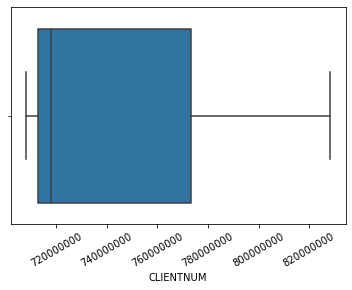

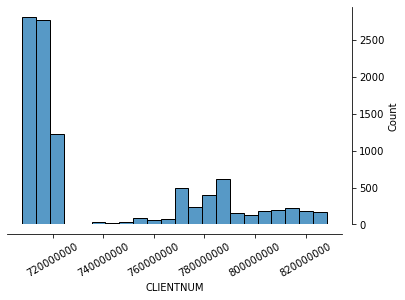


The mean is 739177606.334, which is bigger than the median value of 717926358.0.
The skewness of the distribution is 0.995 which is considered to be moderately skewed.
This variable is left-skewed.  End of univariate analysis for this CLIENTNUM variable.
-------------------------------------------------------------------------------


Now considering the variable Customer_Age...



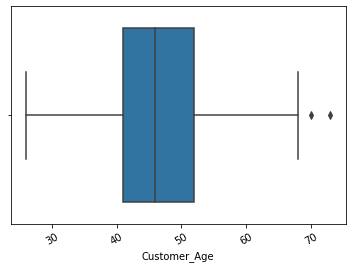

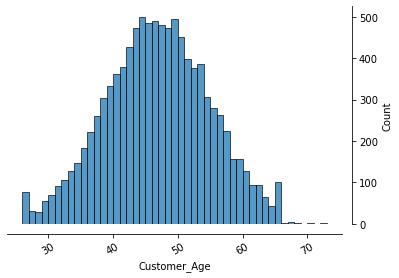


The mean is 46.326, which is bigger than the median value of 46.0.
The skewness of the distribution is -0.034 which is considered to be approximately symmetric.
End of univariate analysis for this variable, Customer_Age.
-------------------------------------------------------------------------------


Now considering the variable Dependent_count...



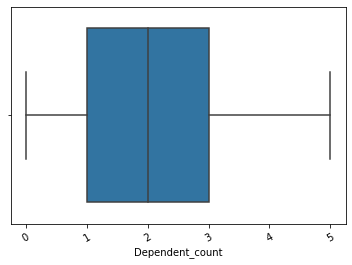

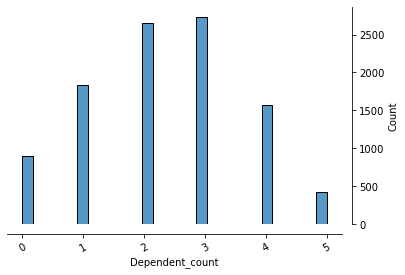


The mean is 2.346, which is bigger than the median value of 2.0.
The skewness of the distribution is -0.021 which is considered to be approximately symmetric.
End of univariate analysis for this variable, Dependent_count.
-------------------------------------------------------------------------------


Now considering the variable Months_on_book...



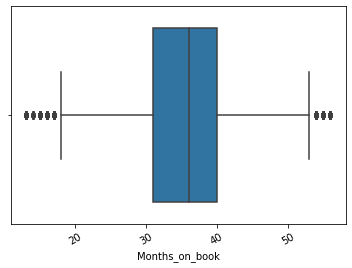

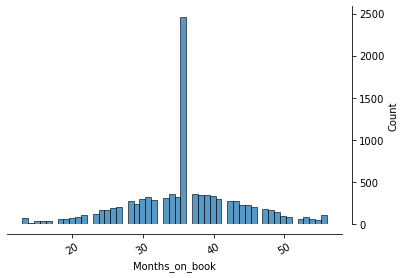


The mean is 35.928, which is less than the median value of 36.0.
The skewness of the distribution is -0.107 which is considered to be approximately symmetric.
End of univariate analysis for this variable, Months_on_book.
-------------------------------------------------------------------------------


Now considering the variable Total_Relationship_Count...



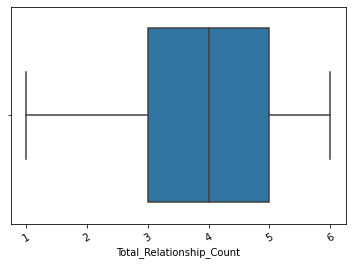

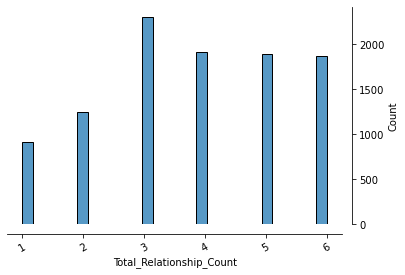


The mean is 3.813, which is less than the median value of 4.0.
The skewness of the distribution is -0.162 which is considered to be approximately symmetric.
End of univariate analysis for this variable, Total_Relationship_Count.
-------------------------------------------------------------------------------


Now considering the variable Months_Inactive_12_mon...



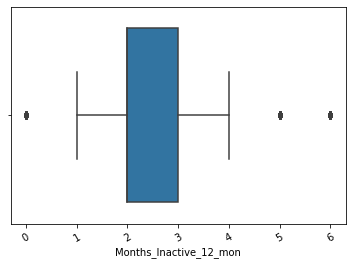

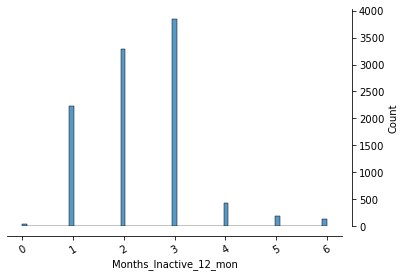


The mean is 2.341, which is bigger than the median value of 2.0.
The skewness of the distribution is 0.633 which is considered to be moderately skewed.
This variable is left-skewed.  End of univariate analysis for this Months_Inactive_12_mon variable.
-------------------------------------------------------------------------------


Now considering the variable Contacts_Count_12_mon...



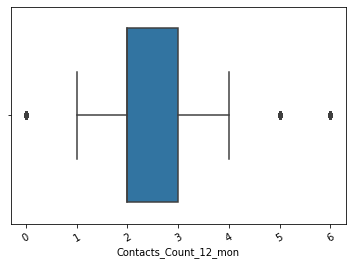

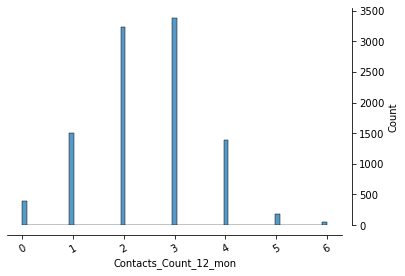


The mean is 2.455, which is bigger than the median value of 2.0.
The skewness of the distribution is 0.011 which is considered to be approximately symmetric.
End of univariate analysis for this variable, Contacts_Count_12_mon.
-------------------------------------------------------------------------------


Now considering the variable Credit_Limit...



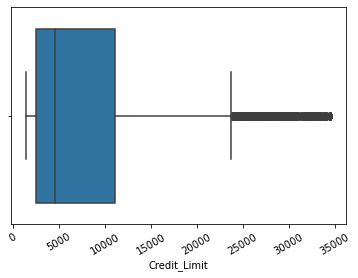

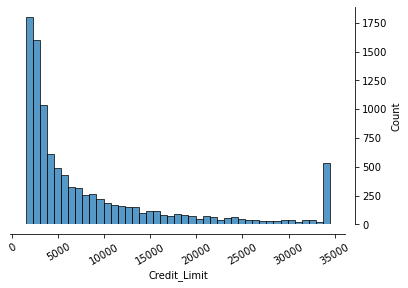


The mean is 8631.954, which is bigger than the median value of 4549.0.
The skewness of the distribution is 1.666 which is considered to be highly skewed.
This variable is left-skewed.  End of univariate analysis for this Credit_Limit variable.
-------------------------------------------------------------------------------


Now considering the variable Total_Revolving_Bal...



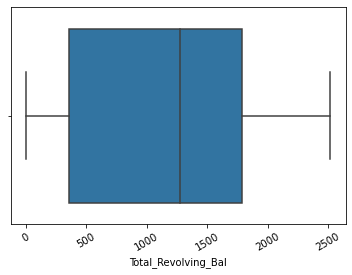

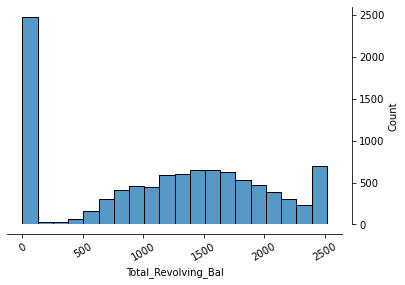


The mean is 1162.814, which is less than the median value of 1276.0.
The skewness of the distribution is -0.149 which is considered to be approximately symmetric.
End of univariate analysis for this variable, Total_Revolving_Bal.
-------------------------------------------------------------------------------


Now considering the variable Avg_Open_To_Buy...



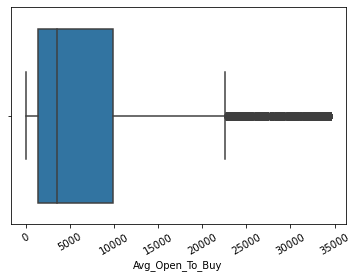

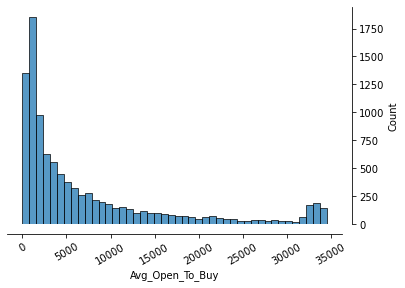


The mean is 7469.14, which is bigger than the median value of 3474.0.
The skewness of the distribution is 1.661 which is considered to be highly skewed.
This variable is left-skewed.  End of univariate analysis for this Avg_Open_To_Buy variable.
-------------------------------------------------------------------------------


Now considering the variable Total_Amt_Chng_Q4_Q1...



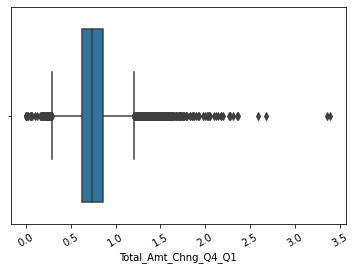

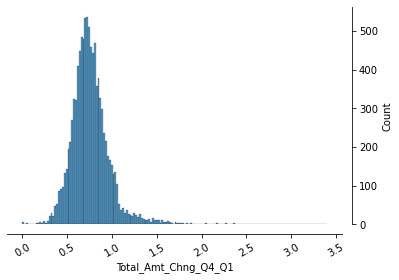


The mean is 0.76, which is bigger than the median value of 0.736.
The skewness of the distribution is 1.732 which is considered to be highly skewed.
This variable is left-skewed.  End of univariate analysis for this Total_Amt_Chng_Q4_Q1 variable.
-------------------------------------------------------------------------------


Now considering the variable Total_Trans_Amt...



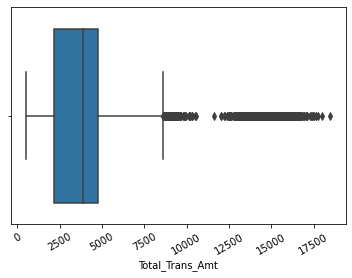

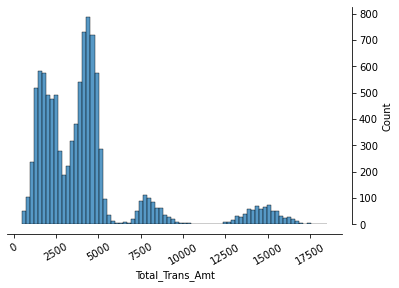


The mean is 4404.086, which is bigger than the median value of 3899.0.
The skewness of the distribution is 2.041 which is considered to be highly skewed.
This variable is left-skewed.  End of univariate analysis for this Total_Trans_Amt variable.
-------------------------------------------------------------------------------


Now considering the variable Total_Trans_Ct...



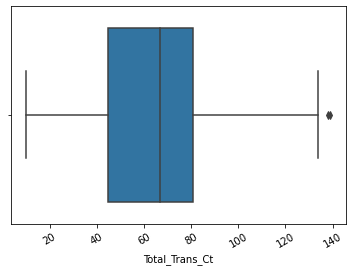

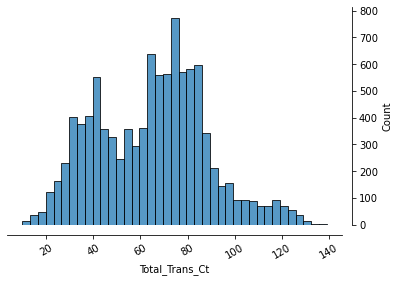


The mean is 64.859, which is less than the median value of 67.0.
The skewness of the distribution is 0.154 which is considered to be approximately symmetric.
End of univariate analysis for this variable, Total_Trans_Ct.
-------------------------------------------------------------------------------


Now considering the variable Total_Ct_Chng_Q4_Q1...



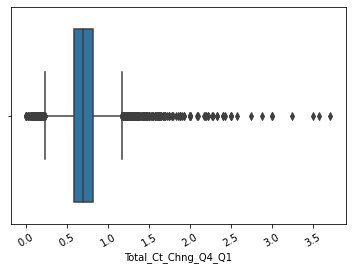

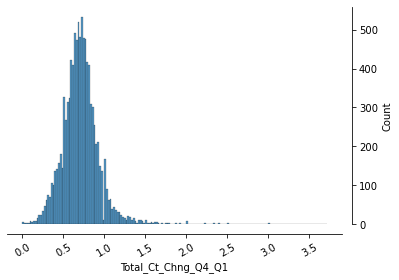


The mean is 0.712, which is bigger than the median value of 0.702.
The skewness of the distribution is 2.064 which is considered to be highly skewed.
This variable is left-skewed.  End of univariate analysis for this Total_Ct_Chng_Q4_Q1 variable.
-------------------------------------------------------------------------------


Now considering the variable Avg_Utilization_Ratio...



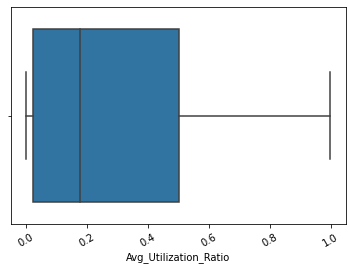

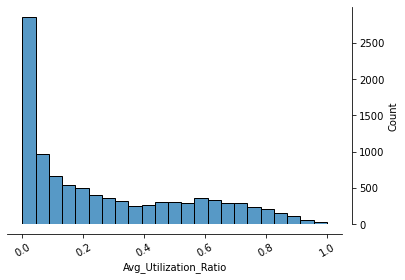


The mean is 0.275, which is bigger than the median value of 0.176.
The skewness of the distribution is 0.718 which is considered to be moderately skewed.
This variable is left-skewed.  End of univariate analysis for this Avg_Utilization_Ratio variable.
-------------------------------------------------------------------------------




In [9]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    my_numeric_univariate_analysis_function(my_col = col, input_dataframe = df)

In [10]:
def my_categorical_univariate_analysis_function(my_col, input_dataframe = df):
    print("Now considering the variable {0}...\n".format(my_col))
    
    # Countplot
    sns.set(rc={'figure.figsize':(15,7)})
    ax = sns.countplot(data = input_dataframe, x = my_col);
    
    total = len(input_dataframe[my_col])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot
    
    # mode
    mode_list = statistics.multimode(input_dataframe[my_col])
    if len(mode_list) == 1:
        mode = mode_list[0]
        mode_part = sum(input_dataframe[my_col] == mode)
        mode_pct = round(100 * mode_part/len(input_dataframe[my_col]), 2)
        print("The mode for {my_col} is {mode}.".format(my_col = my_col, mode = mode))
        print("The mode represents {mode_pct}% of the data.".format(mode_pct = mode_pct))
        
    else:
        mode = mode_list
        print("The modes for {my_col} are {mode}.".format(my_col = my_col, mode = mode))
    
    print("-------------------------------------------------------------------------------\n\n")

Now considering the variable Attrition_Flag...



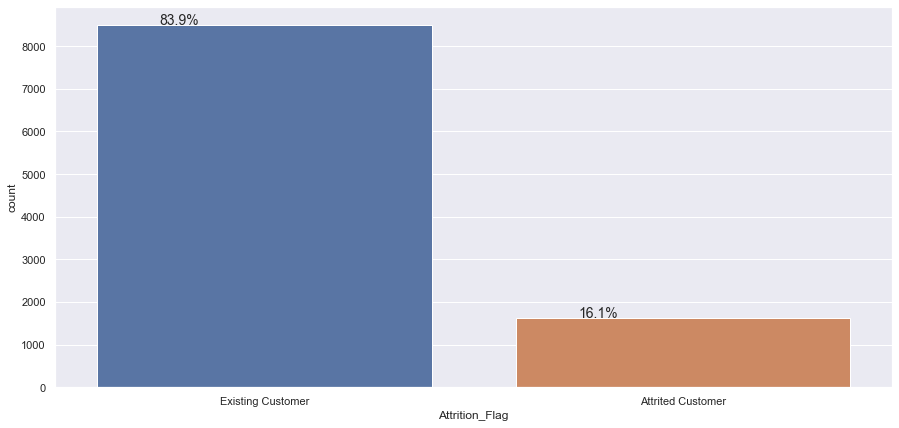

The mode for Attrition_Flag is Existing Customer.
The mode represents 83.93% of the data.
-------------------------------------------------------------------------------


Now considering the variable Gender...



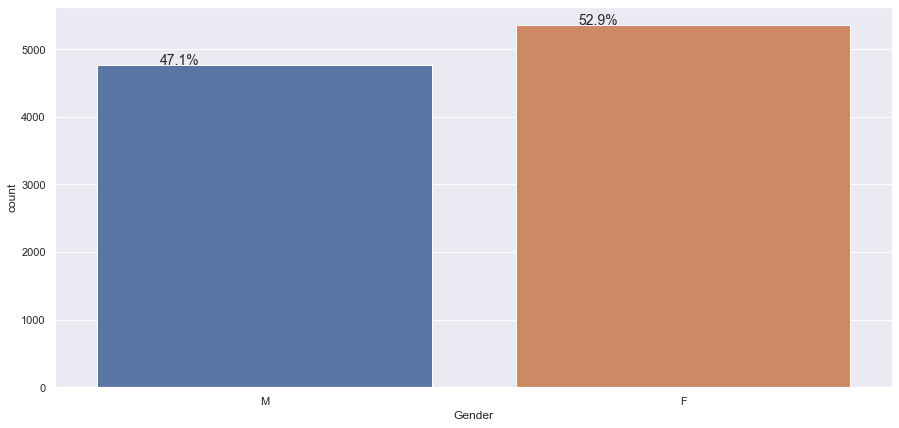

The mode for Gender is F.
The mode represents 52.91% of the data.
-------------------------------------------------------------------------------


Now considering the variable Education_Level...



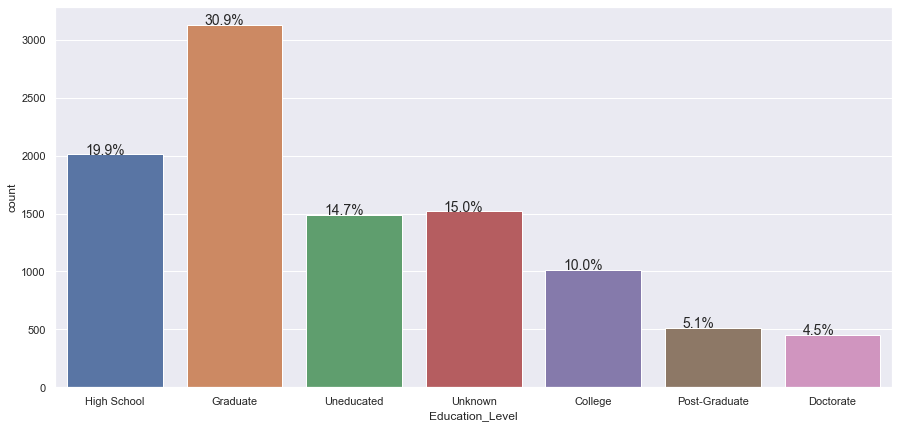

The mode for Education_Level is Graduate.
The mode represents 30.89% of the data.
-------------------------------------------------------------------------------


Now considering the variable Marital_Status...



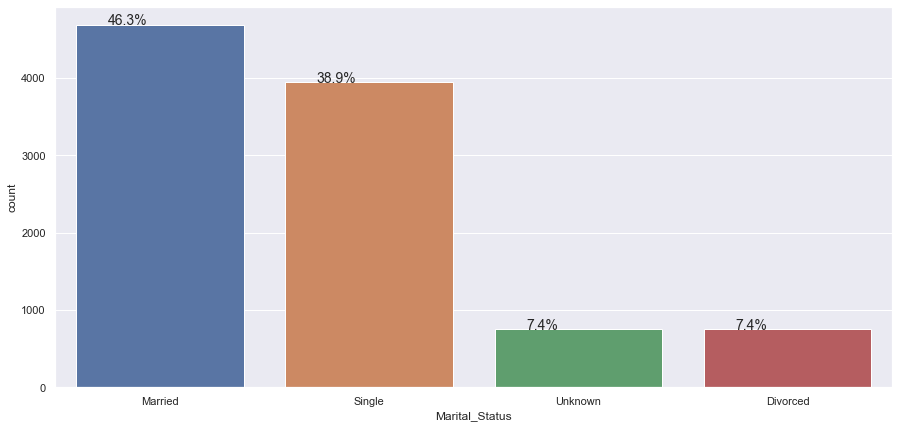

The mode for Marital_Status is Married.
The mode represents 46.28% of the data.
-------------------------------------------------------------------------------


Now considering the variable Income_Category...



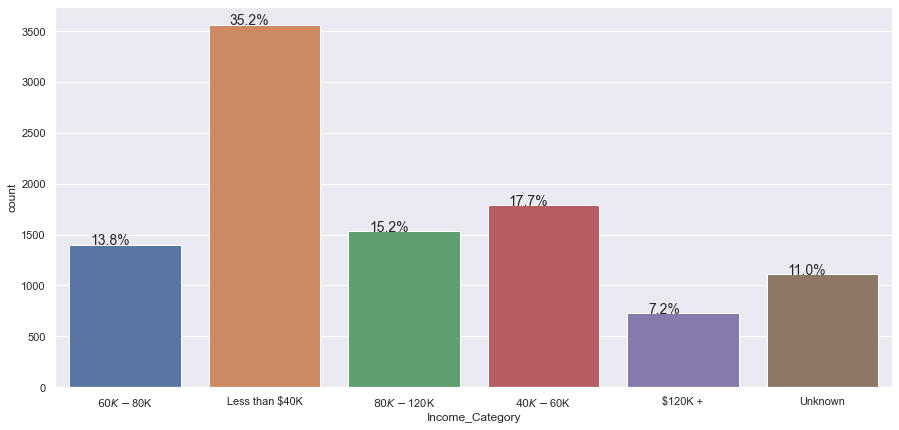

The mode for Income_Category is Less than $40K.
The mode represents 35.16% of the data.
-------------------------------------------------------------------------------


Now considering the variable Card_Category...



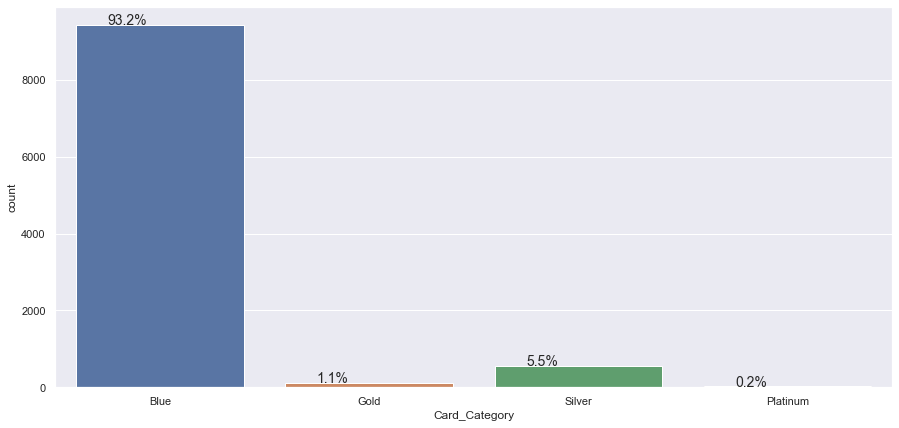

The mode for Card_Category is Blue.
The mode represents 93.18% of the data.
-------------------------------------------------------------------------------




In [11]:
non_num_cols = df.select_dtypes(exclude=np.number).columns.tolist()

for col in non_num_cols:
    my_categorical_univariate_analysis_function(my_col = col, input_dataframe = df)

In [12]:
cookie

CLIENTNUM                   10127
Avg_Open_To_Buy              6813
Credit_Limit                 6205
Total_Trans_Amt              5033
Total_Revolving_Bal          1974
Total_Amt_Chng_Q4_Q1         1158
Avg_Utilization_Ratio         964
Total_Ct_Chng_Q4_Q1           830
Total_Trans_Ct                126
Customer_Age                   45
Months_on_book                 44
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Education_Level                 7
Income_Category                 6
Dependent_count                 6
Total_Relationship_Count        6
Card_Category                   4
Marital_Status                  4
Attrition_Flag                  2
Gender                          2
dtype: int64

In [13]:
# I'm preserve the initial dataframe in case I need to reverse some of these decisions later or to see the data in the raw form later.
archive_df = df.copy()

#  Dropping variable.
# I made this a try-except block just in case I run through this cell multiple times without restarting the kernel.
drop_variable = 'CLIENTNUM'   # Can be multiple variables
try:
    df = df.drop(columns=drop_variable)
    print("Dropping {drop_variable}.".format(drop_variable = drop_variable))
except:
    print("I already dropped {drop_variable}.".format(drop_variable = drop_variable))

Dropping CLIENTNUM.


### Bivariate analysis

I will try to analyze each variable pairwise with the dependent variable.

In [14]:
# Taking a look at all the variables.
print("Here are the variables:")
for var in df.columns:
    print('\t', var)

Here are the variables:
	 Attrition_Flag
	 Customer_Age
	 Gender
	 Dependent_count
	 Education_Level
	 Marital_Status
	 Income_Category
	 Card_Category
	 Months_on_book
	 Total_Relationship_Count
	 Months_Inactive_12_mon
	 Contacts_Count_12_mon
	 Credit_Limit
	 Total_Revolving_Bal
	 Avg_Open_To_Buy
	 Total_Amt_Chng_Q4_Q1
	 Total_Trans_Amt
	 Total_Trans_Ct
	 Total_Ct_Chng_Q4_Q1
	 Avg_Utilization_Ratio


In [15]:
y_variable = 'Attrition_Flag'

POSITIVE_CASE = 'Attrited Customer'
NEGATIVE_CASE = 'Existing Customer'
# Couldn't figure out how to do this in one-line.
x_variables = df.columns.to_list()  # Gets all variables from dataframe
x_variables.remove(y_variable)      # removes the dependent variable 
print(x_variables)                  # Now we have just the x's.'

['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [16]:
def my_t_test(x_var, y_var, positive_case = POSITIVE_CASE, negative_case = NEGATIVE_CASE, input_dataframe = df, alpha = .05):
    '''
    Calculating summary statistics and performing a t-test from those summary statistics.
    This version will only be used for a two-tailed t-test for simplicity.
    Could be enhanced later.
    '''
    
    x0 = input_dataframe[input_dataframe[y_var] == negative_case][x_var].mean()  # x-bar_0
    x1 = input_dataframe[input_dataframe[y_var] == positive_case][x_var].mean() # x-bar_1
    s0 = input_dataframe[input_dataframe[y_var] == negative_case][x_var].std() # std_0
    s1 = input_dataframe[input_dataframe[y_var] == positive_case][x_var].std() # std_1
    n0 = input_dataframe[input_dataframe[y_var] == negative_case][x_var].count() 
    n1 = input_dataframe[input_dataframe[y_var] == positive_case][x_var].count()
    
    pooled_variance = (((n1-1) * (s1 ** 2)) + ((n0-1) * (s0 ** 2)))/(n1 + n0 -2)
    t = (x1 - x0)/np.sqrt(pooled_variance * ((1/n1) + (1/n0)))
    degrees_of_freedom = ((((s1**2)/n1) + ((s0**2)/n0)) ** 2)/((((s1**2)/n1)**2)/(n1-1) + (((s0**2)/n0)**2)/(n0-1))
    crit_t = scipy.stats.t.ppf(1-(alpha/2), degrees_of_freedom)
    pval = scipy.stats.t.sf(np.abs(t), degrees_of_freedom - 1) * 2
    my_output = [["t", "df", "crit_t", "p"], [t, degrees_of_freedom, crit_t, pval]]
    return(my_output)

In [17]:
# This function handles bivariate analysis.  (Default parameters for this y_var and this input_dataframe)
def my_bivariate_analysis_function(x_var, y_var = y_variable, positive_case = POSITIVE_CASE, negative_case = NEGATIVE_CASE, input_dataframe = df, alpha = 0.05):
    sns.set(rc={'figure.figsize':(21,7)})
    
    print("Now considering the variable {0} vs {1}...\n".format(x_var, y_var))
    
    # If it is a numeric variable, execute a violinplot bivariate analysis.
    if str(input_dataframe[x_var].dtype) == 'float64' or str(df[x_var].dtype) == 'int64':
        
        x_bar_0 = round(input_dataframe[input_dataframe[y_var] == negative_case][x_var].mean(), 2)
        x_bar_1 = round(input_dataframe[input_dataframe[y_var] == positive_case][x_var].mean(), 2)
        if math.isnan(x_bar_0):
            pass
        else:
            print("The mean {x_var} of those who have {y_var} is {x_bar_1}.".format(x_var = x_var, y_var = y_var, x_bar_1 = x_bar_1))
            print("The mean {x_var} of those who have not {y_var} is {x_bar_0}.".format(x_var = x_var, y_var = y_var, x_bar_0 = x_bar_0))
            my_t = my_t_test(x_var=x_var,
                             y_var=y_var,
                             positive_case=positive_case,
                             negative_case=negative_case
                            )[1][0]  #  This grabs the t-statistic from my function.
            my_p = my_t_test(x_var=x_var,
                             y_var=y_var,
                             positive_case=positive_case,
                             negative_case=negative_case
                            )[1][3]  #  This grabs the p-value from my function.
        
            if(my_p < alpha):
                print("This difference in means is significant.\n\t(p-value = {p}; t-stat = {t}).".format(p = my_p, t = round(my_t, 3)))
            else:
                print("This difference in means is not statistically significant.")
        
        col1 = y_var
        col2 = x_var
        data = input_dataframe
        sns.catplot(x=col1, y=col2, kind='violin', data=data).set_xticklabels(rotation=45);
        plt.show()
        
    # If it is a non-numeric variable, 
    elif str(input_dataframe[x_var].dtype) == 'category' or str(input_dataframe[x_var].dtype) == 'object':
        col1 = y_var
        col2 = x_var
        data = df
        sns.catplot(hue=col1, x=col2, kind='count', data=data).set_xticklabels(rotation=45);
        plt.show()
    
    # Just here in case I encounter a different dtype in the future.
    else:
        print("This variable has a different dtype.  It is {x}.".format(x = str(input_dataframe[x_var].dtype)))  
    print("-------------------------------------------------------------------------------\n\n")

Now considering the variable Customer_Age vs Attrition_Flag...

The mean Customer_Age of those who have Attrition_Flag is 46.66.
The mean Customer_Age of those who have not Attrition_Flag is 46.26.
This difference in means is not statistically significant.


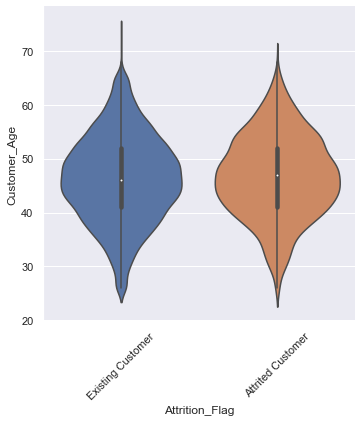

-------------------------------------------------------------------------------


Now considering the variable Gender vs Attrition_Flag...



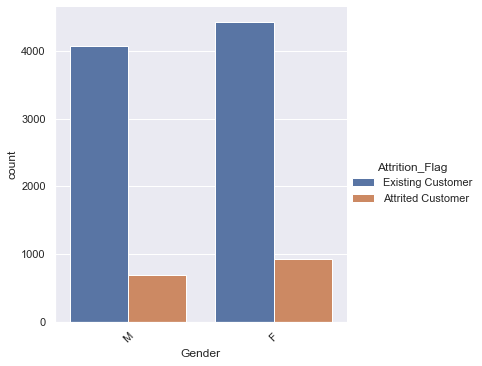

-------------------------------------------------------------------------------


Now considering the variable Dependent_count vs Attrition_Flag...

The mean Dependent_count of those who have Attrition_Flag is 2.4.
The mean Dependent_count of those who have not Attrition_Flag is 2.34.
This difference in means is not statistically significant.


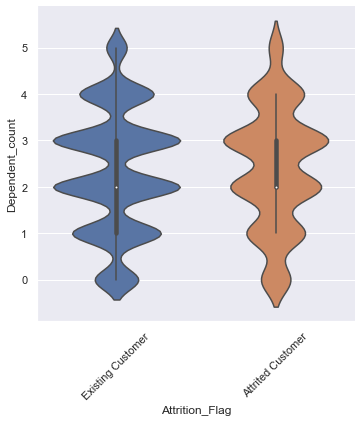

-------------------------------------------------------------------------------


Now considering the variable Education_Level vs Attrition_Flag...



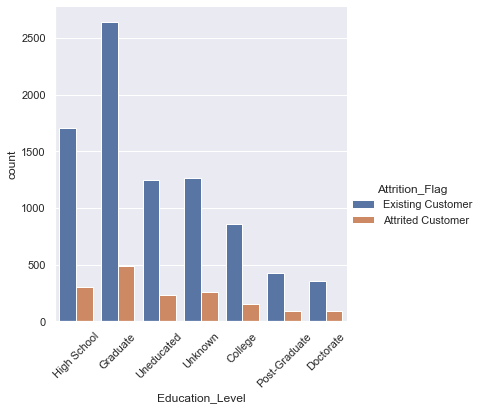

-------------------------------------------------------------------------------


Now considering the variable Marital_Status vs Attrition_Flag...



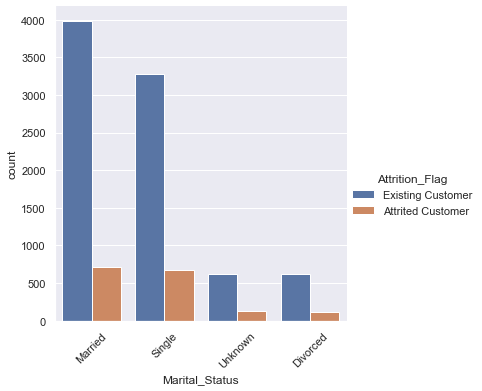

-------------------------------------------------------------------------------


Now considering the variable Income_Category vs Attrition_Flag...



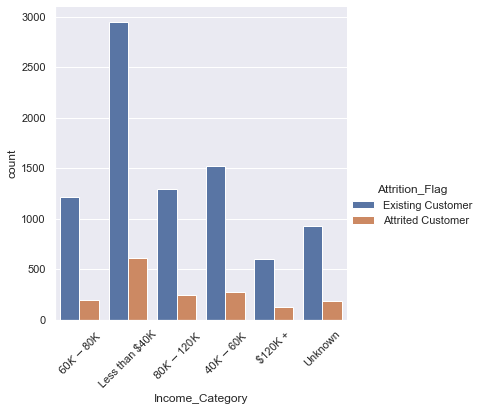

-------------------------------------------------------------------------------


Now considering the variable Card_Category vs Attrition_Flag...



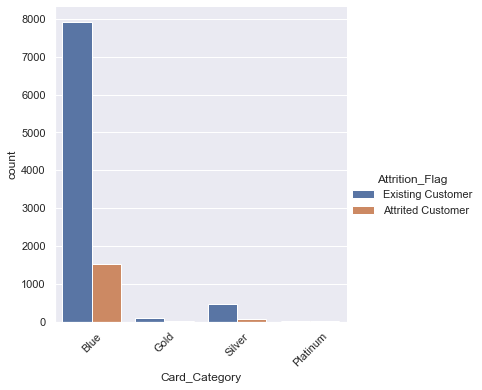

-------------------------------------------------------------------------------


Now considering the variable Months_on_book vs Attrition_Flag...

The mean Months_on_book of those who have Attrition_Flag is 36.18.
The mean Months_on_book of those who have not Attrition_Flag is 35.88.
This difference in means is not statistically significant.


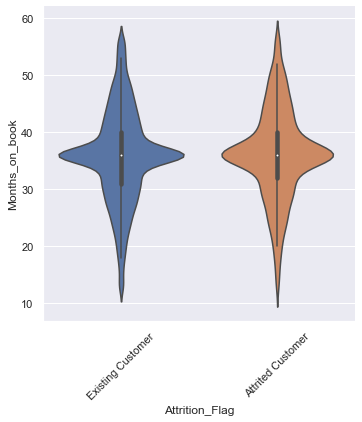

-------------------------------------------------------------------------------


Now considering the variable Total_Relationship_Count vs Attrition_Flag...

The mean Total_Relationship_Count of those who have Attrition_Flag is 3.28.
The mean Total_Relationship_Count of those who have not Attrition_Flag is 3.91.
This difference in means is significant.
	(p-value = 3.8174879745051295e-50; t-stat = -15.267).


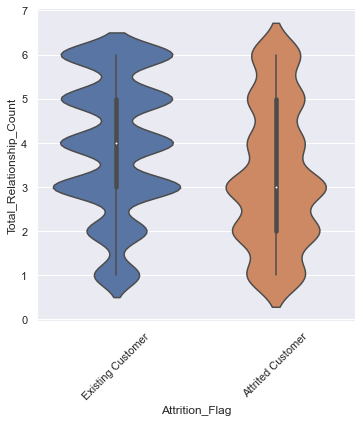

-------------------------------------------------------------------------------


Now considering the variable Months_Inactive_12_mon vs Attrition_Flag...

The mean Months_Inactive_12_mon of those who have Attrition_Flag is 2.69.
The mean Months_Inactive_12_mon of those who have not Attrition_Flag is 2.27.
This difference in means is significant.
	(p-value = 6.2477791466795484e-52; t-stat = 15.521).


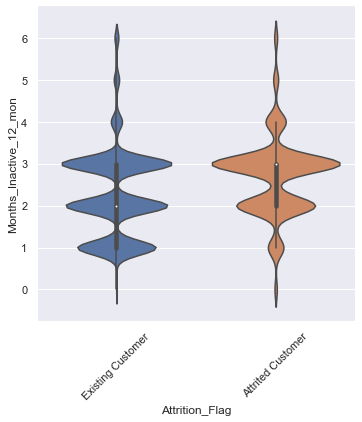

-------------------------------------------------------------------------------


Now considering the variable Contacts_Count_12_mon vs Attrition_Flag...

The mean Contacts_Count_12_mon of those who have Attrition_Flag is 2.97.
The mean Contacts_Count_12_mon of those who have not Attrition_Flag is 2.36.
This difference in means is significant.
	(p-value = 8.247800892298317e-90; t-stat = 21.021).


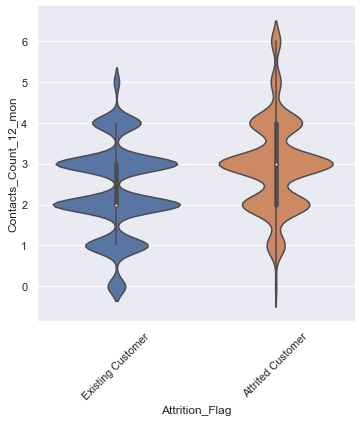

-------------------------------------------------------------------------------


Now considering the variable Credit_Limit vs Attrition_Flag...

The mean Credit_Limit of those who have Attrition_Flag is 8136.04.
The mean Credit_Limit of those who have not Attrition_Flag is 8726.88.
This difference in means is significant.
	(p-value = 0.016346605555454093; t-stat = -2.403).


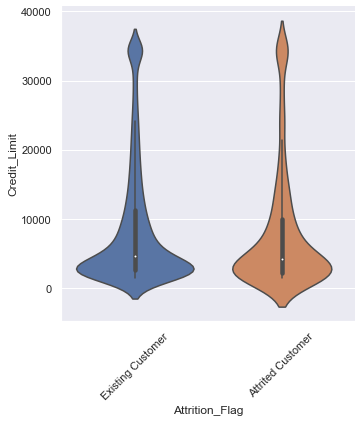

-------------------------------------------------------------------------------


Now considering the variable Total_Revolving_Bal vs Attrition_Flag...

The mean Total_Revolving_Bal of those who have Attrition_Flag is 672.82.
The mean Total_Revolving_Bal of those who have not Attrition_Flag is 1256.6.
This difference in means is significant.
	(p-value = 1.4233645880766252e-141; t-stat = -27.435).


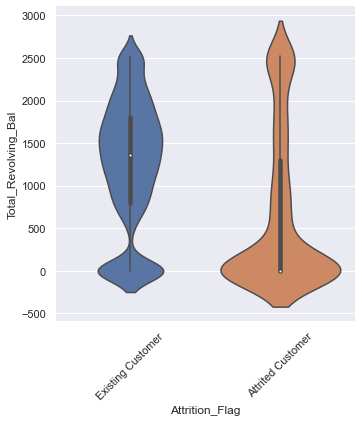

-------------------------------------------------------------------------------


Now considering the variable Avg_Open_To_Buy vs Attrition_Flag...

The mean Avg_Open_To_Buy of those who have Attrition_Flag is 7463.22.
The mean Avg_Open_To_Buy of those who have not Attrition_Flag is 7470.27.
This difference in means is not statistically significant.


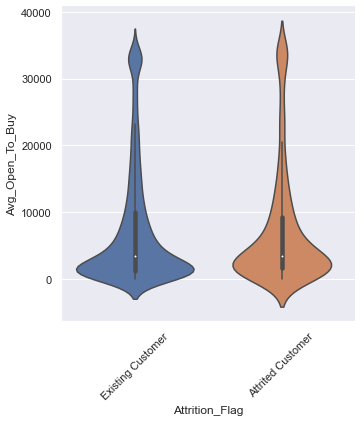

-------------------------------------------------------------------------------


Now considering the variable Total_Amt_Chng_Q4_Q1 vs Attrition_Flag...

The mean Total_Amt_Chng_Q4_Q1 of those who have Attrition_Flag is 0.69.
The mean Total_Amt_Chng_Q4_Q1 of those who have not Attrition_Flag is 0.77.
This difference in means is significant.
	(p-value = 5.8301652755872143e-39; t-stat = -13.303).


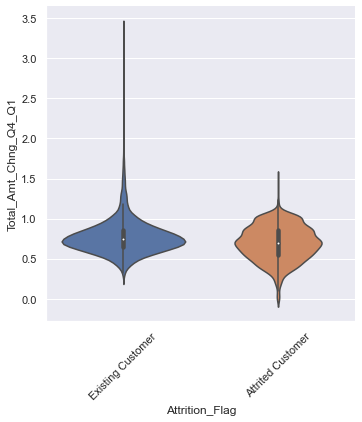

-------------------------------------------------------------------------------


Now considering the variable Total_Trans_Amt vs Attrition_Flag...

The mean Total_Trans_Amt of those who have Attrition_Flag is 3095.03.
The mean Total_Trans_Amt of those who have not Attrition_Flag is 4654.66.
This difference in means is significant.
	(p-value = 1.2955174910905131e-63; t-stat = -17.211).


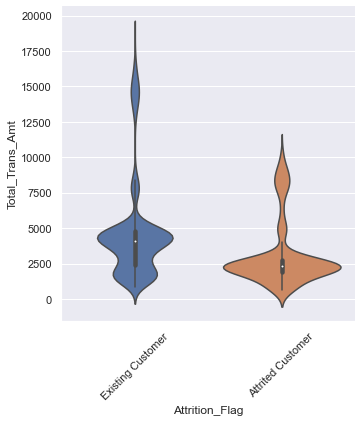

-------------------------------------------------------------------------------


Now considering the variable Total_Trans_Ct vs Attrition_Flag...

The mean Total_Trans_Ct of those who have Attrition_Flag is 44.93.
The mean Total_Trans_Ct of those who have not Attrition_Flag is 68.67.
This difference in means is significant.
	(p-value = 7.923757769771171e-290; t-stat = -40.251).


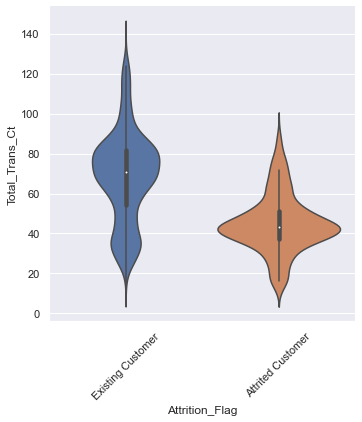

-------------------------------------------------------------------------------


Now considering the variable Total_Ct_Chng_Q4_Q1 vs Attrition_Flag...

The mean Total_Ct_Chng_Q4_Q1 of those who have Attrition_Flag is 0.55.
The mean Total_Ct_Chng_Q4_Q1 of those who have not Attrition_Flag is 0.74.
This difference in means is significant.
	(p-value = 7.946997866940454e-172; t-stat = -30.497).


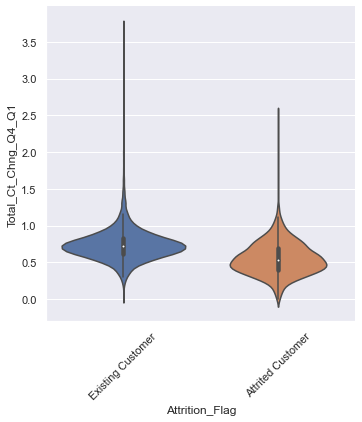

-------------------------------------------------------------------------------


Now considering the variable Avg_Utilization_Ratio vs Attrition_Flag...

The mean Avg_Utilization_Ratio of those who have Attrition_Flag is 0.16.
The mean Avg_Utilization_Ratio of those who have not Attrition_Flag is 0.3.
This difference in means is significant.
	(p-value = 1.2440276837414614e-69; t-stat = -18.245).


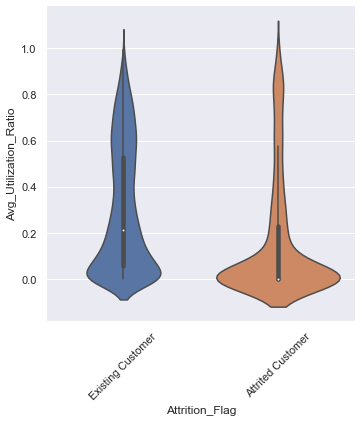

-------------------------------------------------------------------------------




In [18]:
for x_var in x_variables:
    my_bivariate_analysis_function(x_var)

### Use appropriate visualizations to identify the patterns and insights

In [19]:
# Just getting the target variable into binary format for a quick heatmap display.  Will consider a better method later.
reclassify_dict = {'Attrited Customer' : 1, 'Existing Customer' : 0}
df['target'] = df['Attrition_Flag'].map(reclassify_dict)

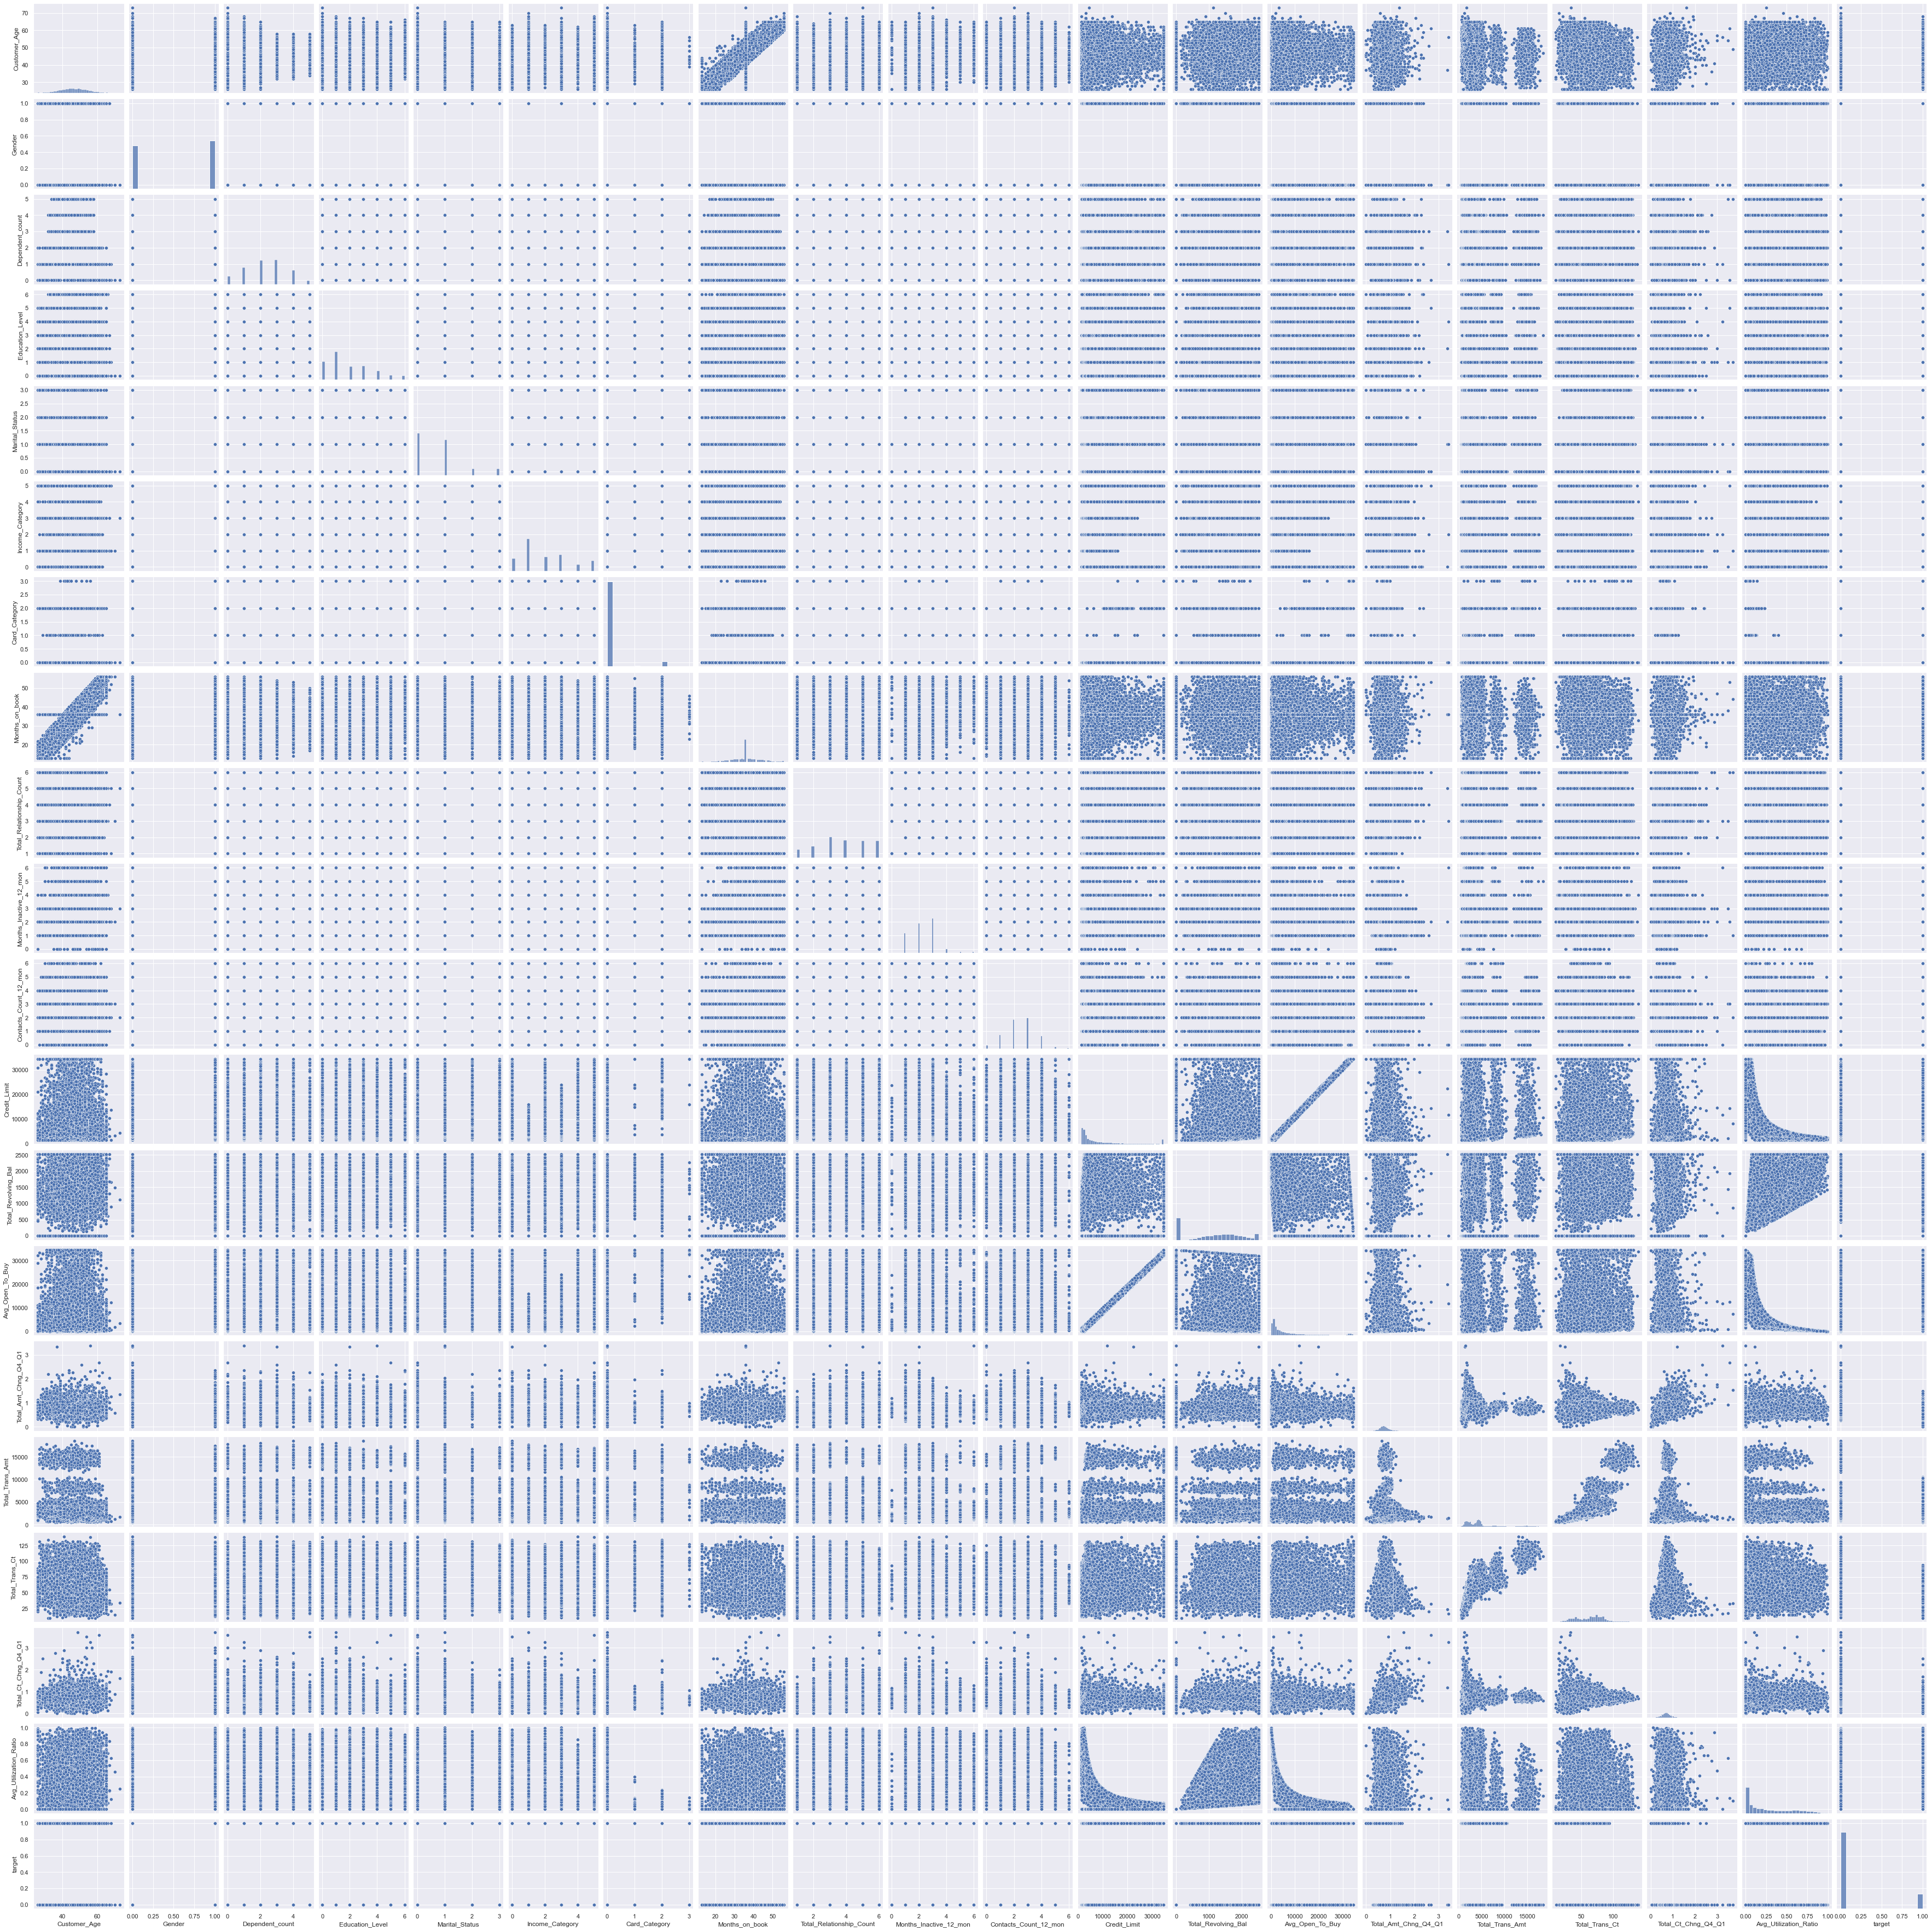

In [243]:
sns.pairplot(df);

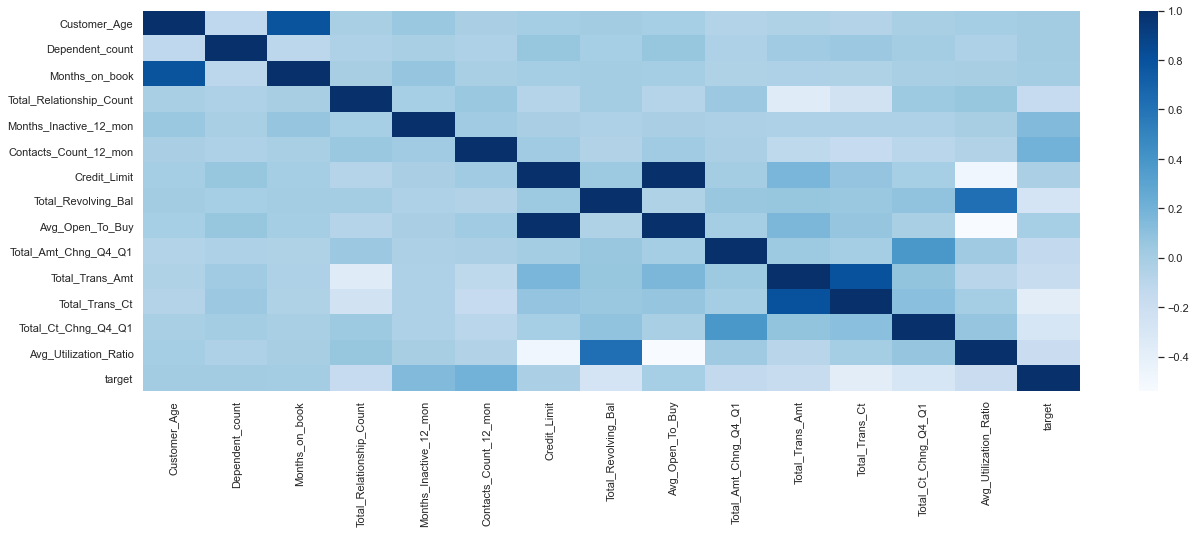

In [20]:
sns.heatmap(data = df.corr(), cmap = 'Blues');

### Any other exploratory deep dive

In [21]:
var_of_interest = 'Months_on_book'
print("I'm going to take a closer look at {var}.".format(var = var_of_interest))
df[var_of_interest].describe()

I'm going to take a closer look at Months_on_book.


count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64

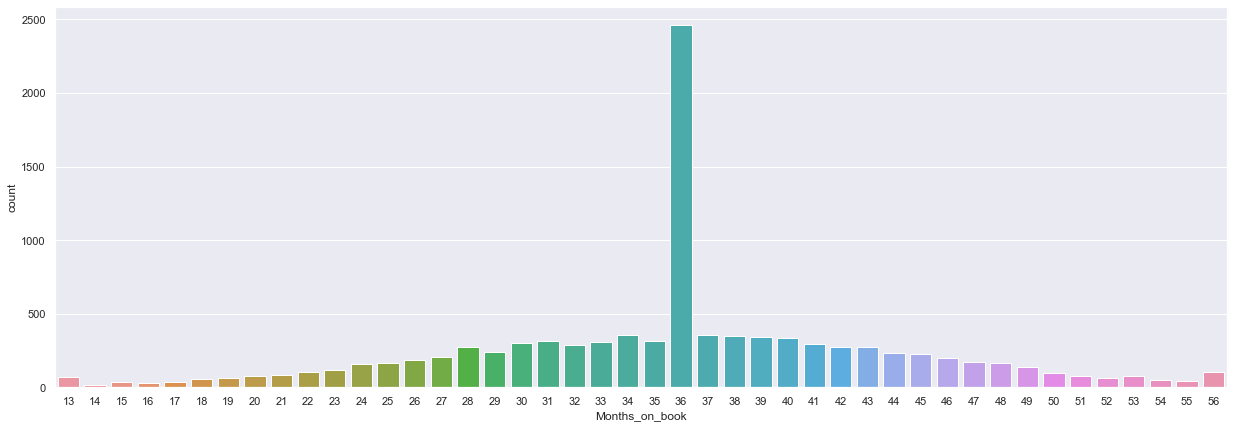

In [22]:
sns.countplot(data = df, x = var_of_interest);

In [23]:
my_mode = df['Months_on_book'].mode()[0]
mode_part = sum(df[var_of_interest] == my_mode)
mode_pct = round(100 * mode_part/len(df[var_of_interest]), 2)
print("For {0}, {1}% of the values are in the mode, which is {2}.".format(var_of_interest, mode_pct, my_mode))
m_plus_1 = my_mode + 1
m_less_1 = my_mode - 1
mp1_part = sum(df[var_of_interest] == m_plus_1)
ml1_part = sum(df[var_of_interest] == m_less_1)
mp1_pct = round(100 * mp1_part/len(df[var_of_interest]), 2)
ml1_pct = round(100 * ml1_part/len(df[var_of_interest]), 2)
print("For comparison, the percent of values 1 below and 1 above the mode are {0}% and {1}%.".format(ml1_pct, mp1_pct))

For Months_on_book, 24.32% of the values are in the mode, which is 36.
For comparison, the percent of values 1 below and 1 above the mode are 3.13% and 3.54%.


The data show very odd behavior at the mode / median value.  I can't think of many good business-related reasons for there to be such a spike there but then to still see roughly symmetric behavior on both sides of this value.

Here are the two possible reasons I see:
1. The business acquired a bunch of customers from other banks but only wanted those with exactly 36 months (for some unknown reason).  They decided to only do this once and thus only have that one individual high peak.
2. More likely, once upon a time, there were missing values, and a previous analyst clumsily applied mean imputation to the distribution, thus artificially and arbitrarily driving up this spike in the center.

I would like to see if there is any discernible pattern related to the Attrition Flag at 36 months compared to other values.


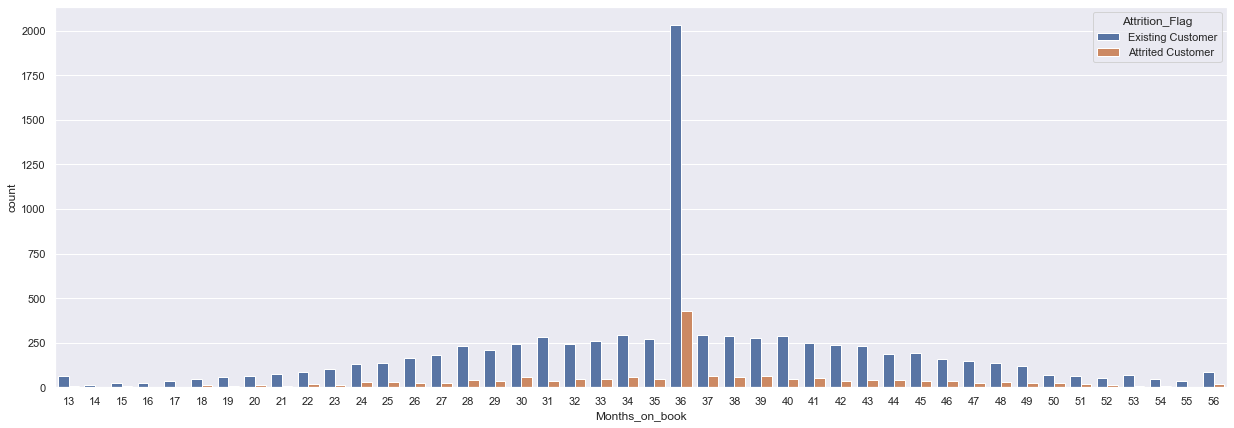

There is nothing special going on there that I can see.


In [24]:
print("I would like to see if there is any discernible pattern related to the Attrition Flag at 36 months compared to other values.")
sns.countplot(data = df, x = var_of_interest, hue = 'Attrition_Flag');
plt.show()
print("There is nothing special going on there that I can see.")

I will take a closer look by looking at the percent of customers attrited at each month value.



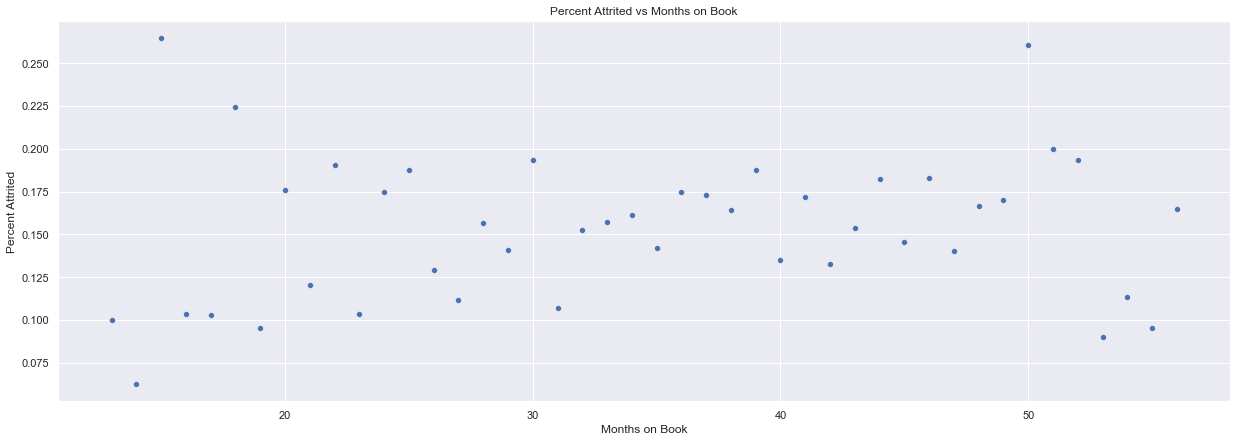

There is nothing special about Months on Book == 36 here.
There is also no eye-test detectable relationship between months on book and percent attrited.


In [25]:
print("I will take a closer look by looking at the percent of customers attrited at each month value.", end = '\n\n')
pct_attrited_by_month = df[['Months_on_book', 'target']].groupby('Months_on_book').mean()
my_x = pct_attrited_by_month.index
my_y = pct_attrited_by_month['target']
fig = sns.scatterplot(x = my_x, y = my_y)
plt.ylabel("Percent Attrited")
plt.xlabel("Months on Book")
plt.title("Percent Attrited vs Months on Book") # You can comment this line out if you don't need title
plt.show()
print("There is nothing special about Months on Book == 36 here.")
print("There is also no eye-test detectable relationship between months on book and percent attrited.")

## Illustrate the insights based on EDA	- 5 pts

### Key meaningful observations on the relationship between variables

There is something going on that is interesting at the maximum credit limit level.  This looks like a censored distribution.


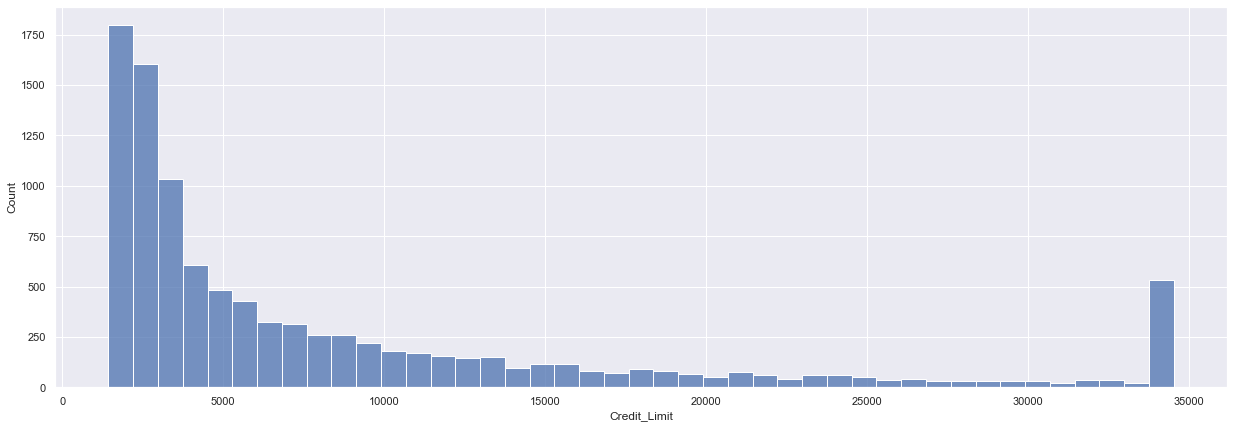

Across all credit limits, there is 16.07% Attrited Customers,but at the capped max credit limit of $34516.00, there is 17.52% Attrited Customers
Therefore, we may be chasing away high-income customers with arbitrarily low credit limits.


In [26]:
max_credit_limit = df['Credit_Limit'].max()
pct_attrited_at_max_credit_limit = str(round(sum(df[df['Credit_Limit'] == max_credit_limit]['target'])/len(df[df['Credit_Limit'] == max_credit_limit]),4)*100) + '%'
pct_attrited_population = str(round(df['target'].sum()/len(df),4) * 100) + '%'

sns.histplot(data = df, x = 'Credit_Limit');
print("There is something going on that is interesting at the maximum credit limit level.  This looks like a censored distribution.")
plt.show()
print("Across all credit limits, there is {x} Attrited Customers,".format(x = pct_attrited_population) +
      "but at the capped max credit limit of ${max_credit_limit}0, there is ".format(max_credit_limit = max_credit_limit)
      + "{y} Attrited Customers".format(y = pct_attrited_at_max_credit_limit))
print("Therefore, we may be chasing away high-income customers with arbitrarily low credit limits.")

## Variables that have statistically significant relationships with the target variable include:
### Total_Relationship_Count
#### Total Relationship Count, defined as the total number of products held by a customer, does appear to have a statistically significant relationship.  Customers with more products (higher Total_Relationship_Count) are found more often in the 'Existing Customer' group than in the 'Attrited Customer' group.

### Contacts_Count_12_months
#### Contacts_Count_12_months, defined as the number of contacts in the last 12 months, has a negative relationship with customer continuation.  In other words, the higher the number of contacts made by the bank within the past year, the more likely the customer has attrited.

### Credit_Limit (max credit case explored above.)
#### The credit limit is a bit harder to see on the bivariate violin plot, but the t-test clearly indicates that, on average, the group of continuing customers has a higher credit limit than the group who attrited.

### Total_Trans_Amt
#### The total transaction amount has pretty distinct behavior when comparing the continuing customers to the attrited ones.  There is a much higher average (4600 vs 3100 dollars) among the continuing customers than among those who quit our bank.

### Total_Trans_Ct
#### In addition to the Total Transaction Amount, the Total Transaction Count is also much higher among the loyal, continuing customers than among those who have departed from the financial services of our bank.

## Data Pre-processing - 5 pts

### Prepare the data for analysis

In [27]:
# Getting the variables that I will apply mappings to.
word_cols = df.select_dtypes(include='object').columns.tolist()
word_cols

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [28]:
# Saving the original dataframe in case we need to roll back any changes.
orig_df = df.copy()

In [29]:
# I wanted to automate the transformation process instead of having to type out all of these dictionary values for all of these columns.

for col in word_cols[1:]:  # Starting with the 2nd element because the first is the dependent variable that we already made a target variable for.
    my_keys = df[col].unique().tolist()
    my_values = range(df[col].nunique())
    my_dict = dict(zip(my_keys, my_values))

    print('for', col, "we created this dict:")
    print(my_dict)
    
    print("We now apply the dictionary.")
    df[col] = df[col].map(my_dict)
    print('-' * 44, '\n')

for Gender we created this dict:
{'M': 0, 'F': 1}
We now apply the dictionary.
-------------------------------------------- 

for Education_Level we created this dict:
{'High School': 0, 'Graduate': 1, 'Uneducated': 2, 'Unknown': 3, 'College': 4, 'Post-Graduate': 5, 'Doctorate': 6}
We now apply the dictionary.
-------------------------------------------- 

for Marital_Status we created this dict:
{'Married': 0, 'Single': 1, 'Unknown': 2, 'Divorced': 3}
We now apply the dictionary.
-------------------------------------------- 

for Income_Category we created this dict:
{'$60K - $80K': 0, 'Less than $40K': 1, '$80K - $120K': 2, '$40K - $60K': 3, '$120K +': 4, 'Unknown': 5}
We now apply the dictionary.
-------------------------------------------- 

for Card_Category we created this dict:
{'Blue': 0, 'Gold': 1, 'Silver': 2, 'Platinum': 3}
We now apply the dictionary.
-------------------------------------------- 



In [30]:
print("We now have only number variables, except for 'Attrition_Flag', and that one already has a numeric copy in 'target'.", end = '\n\n')
df.head().style.hide_index()

We now have only number variables, except for 'Attrition_Flag', and that one already has a numeric copy in 'target'.



**Split Data**

In [31]:
X = df.drop(['Attrition_Flag', 'target'],axis=1)
y = df['target']

In [32]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


### Missing value Treatment

In [33]:
null_col_df = pd.DataFrame(df.isna().sum()).rename(columns={0:"num_null"})
num_null_col = sum(null_col_df['num_null']>0)
null_cols = null_col_df[null_col_df['num_null']>0].index.tolist()

if num_null_col == 0:
    print("There are no null columns.  Missing value treatment will be unnecessary.")
else:
    print("There are {x} null columns.  Missing value treatment will be necessary on the following columns....".format(x = num_null_col))
    for col in null_cols:
        print("Column", col, "will be treated.")

There are no null columns.  Missing value treatment will be unnecessary.


In [34]:
# # I was going to get rid of that huge spike at the mode/median
# #  I couldn't get this to work (I was hoping to spread out that big spike, but I'll comment this out instead of deleting it in case I want to tackle it in the future.)

# df_months_on_book_fixer = df.copy()

# df_months_on_book_fixer['Months_on_book'].replace(36, np.NaN, inplace = True)

# imputer = KNNImputer(n_neighbors=5)

# df_months_on_book_fixer[['Months_on_book']]=imputer.fit_transform(df_months_on_book_fixer[['Months_on_book']])

# sns.countplot(data = df, x = 'Months_on_book');
# plt.show()

# sns.countplot(data = df_months_on_book_fixer, x = 'Months_on_book');
# plt.show()

### Outlier Detection (treat, if needed. Why or why not)

In [35]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                        int64
Dependent_count               int64
Education_Level               int64
Marital_Status                int64
Income_Category               int64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
target                        int64
dtype: object

In [36]:
df.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
target                         2
dtype: int64

In [37]:
# I will try winsorizing.
#  I learned about this in Patrick Hall's data mining class at George Washington University Fall 2017.
# https://github.com/jphall663/GWU_data_mining/blob/master/02_analytical_data_prep/src/py_part_2_winsorize.ipynb
from scipy.stats.mstats import winsorize # scipy for stats and more advanced calculations

winsor_test_df = df.copy()

float_col = df.select_dtypes('float').columns.tolist()

winsor_test_df[float_col]

for col in float_col:
    winsorize(winsor_test_df[col], limits=[0.1, 0.1], inplace=True)

pre-treatment, Credit_Limit
max:  34516.0
min:  1438.3


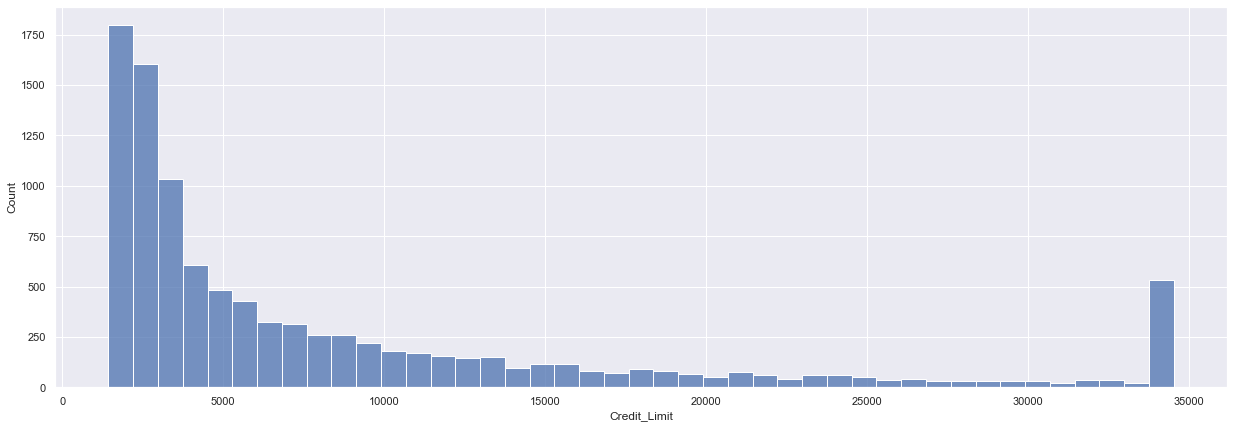

post-treatment, Credit_Limit
max:  23402.0
min:  1762.0


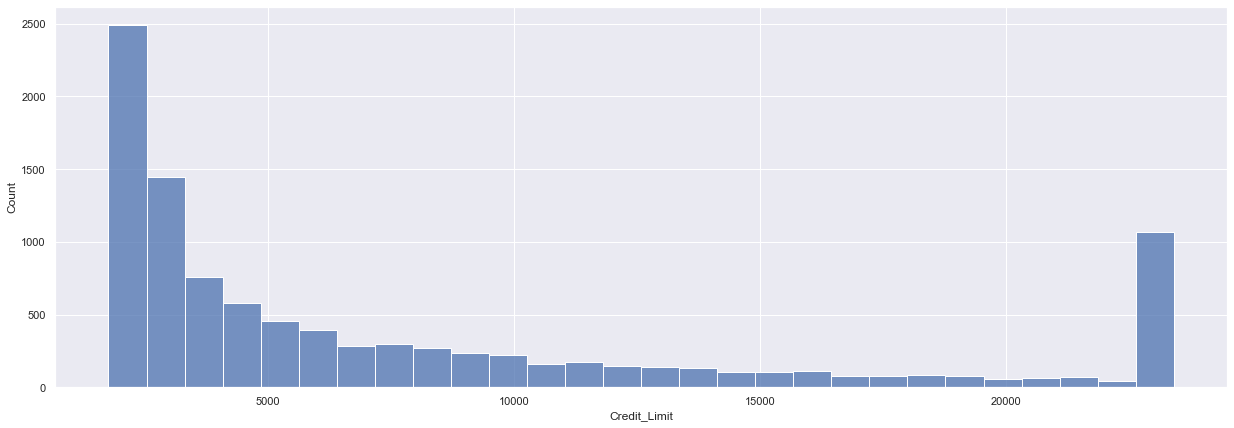

pre-treatment, Avg_Open_To_Buy
max:  34516.0
min:  3.0


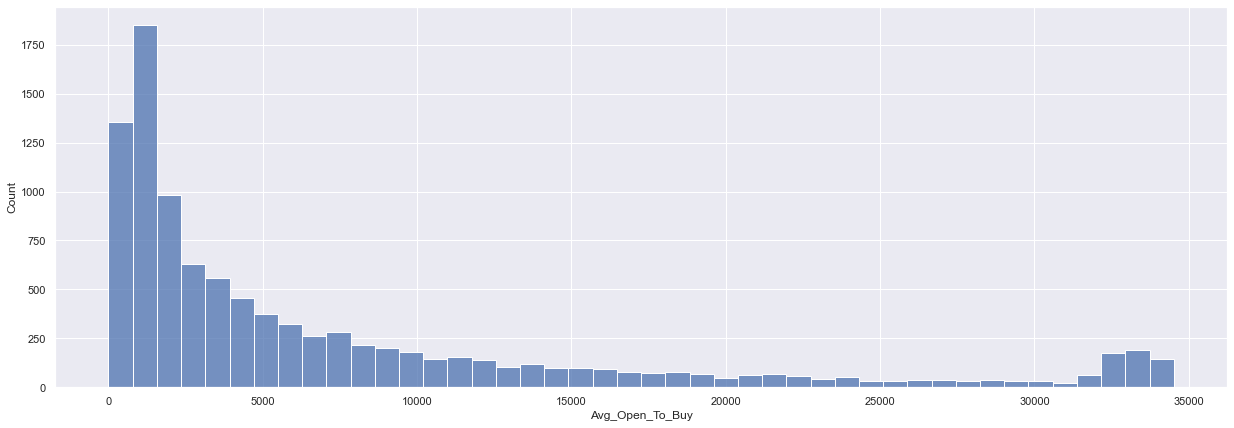

post-treatment, Avg_Open_To_Buy
max:  21970.0
min:  683.0


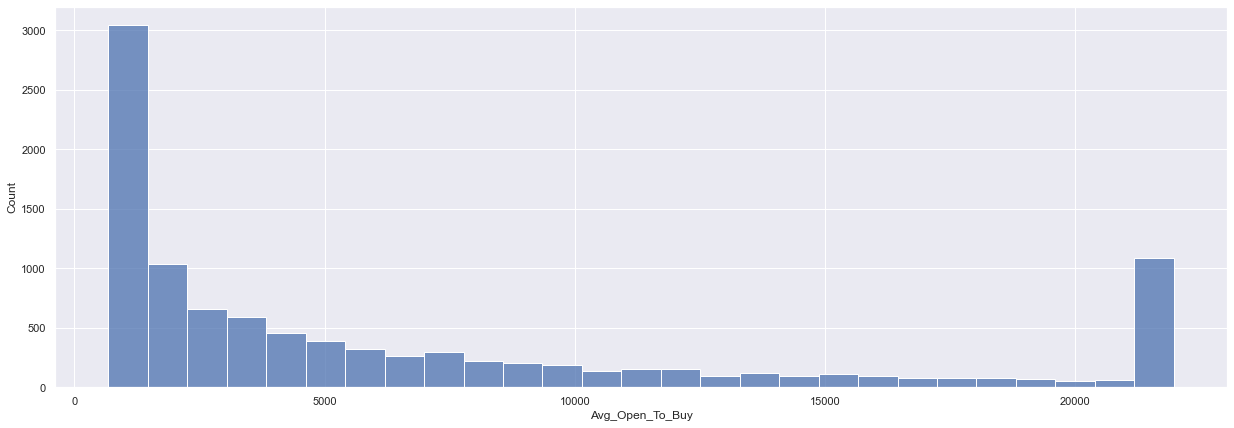

pre-treatment, Total_Amt_Chng_Q4_Q1
max:  3.397
min:  0.0


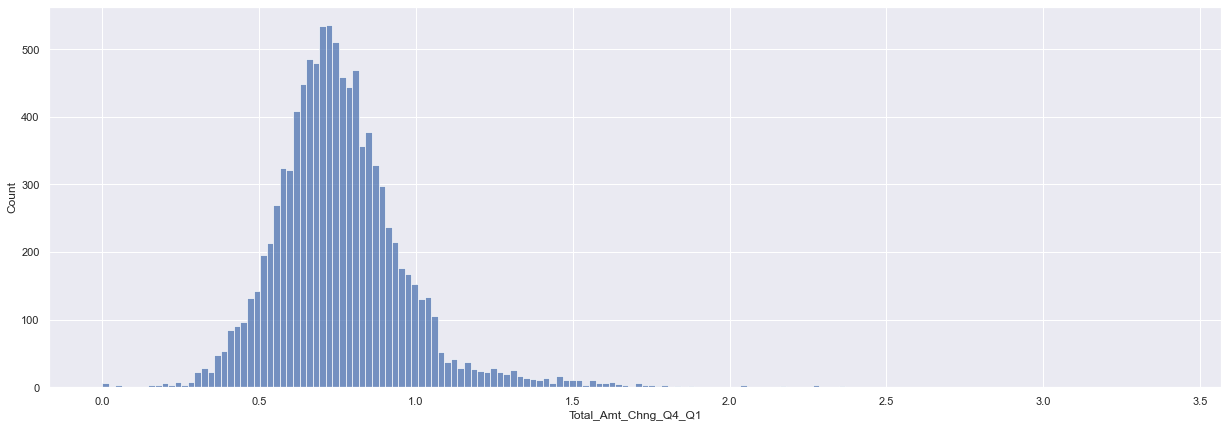

post-treatment, Total_Amt_Chng_Q4_Q1
max:  0.998
min:  0.531


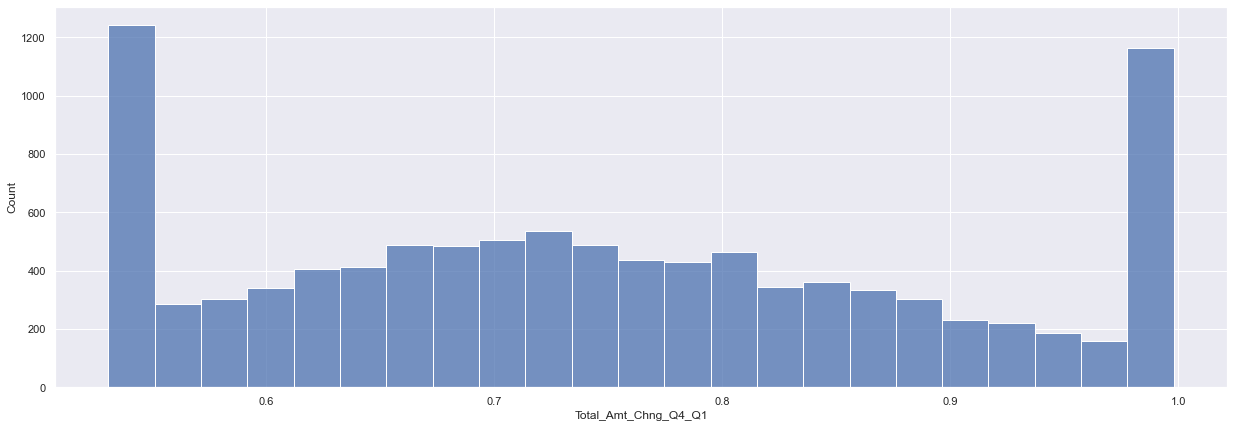

pre-treatment, Total_Ct_Chng_Q4_Q1
max:  3.714
min:  0.0


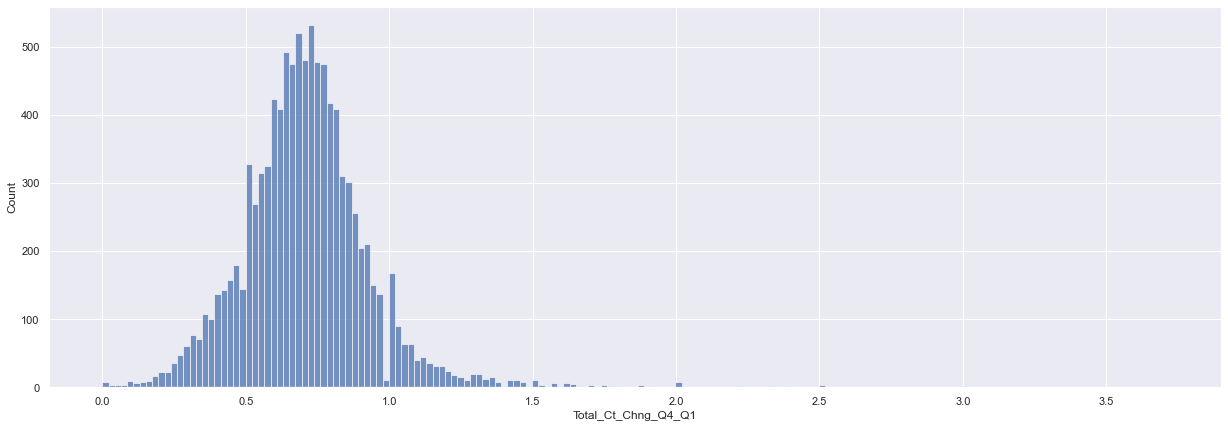

post-treatment, Total_Ct_Chng_Q4_Q1
max:  0.95
min:  0.452


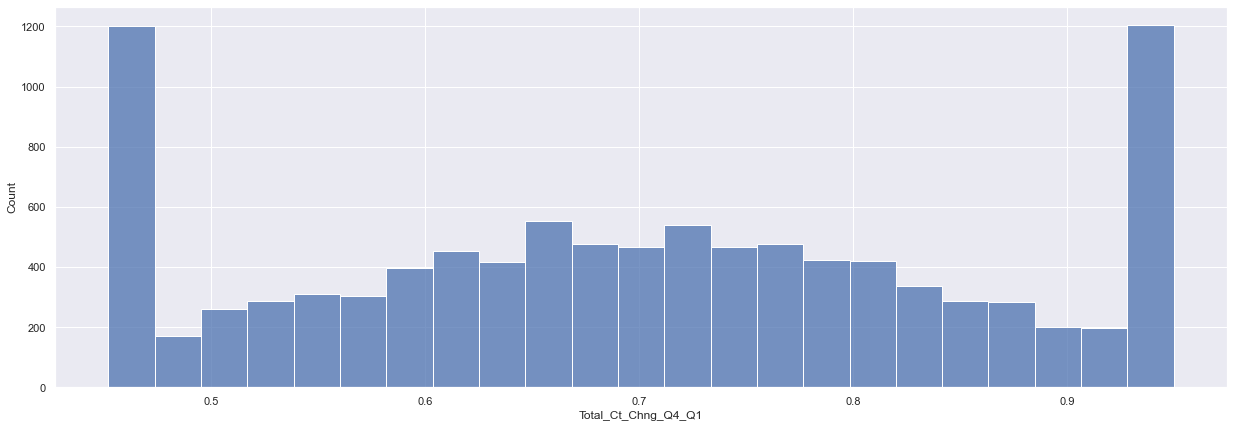

pre-treatment, Avg_Utilization_Ratio
max:  0.999
min:  0.0


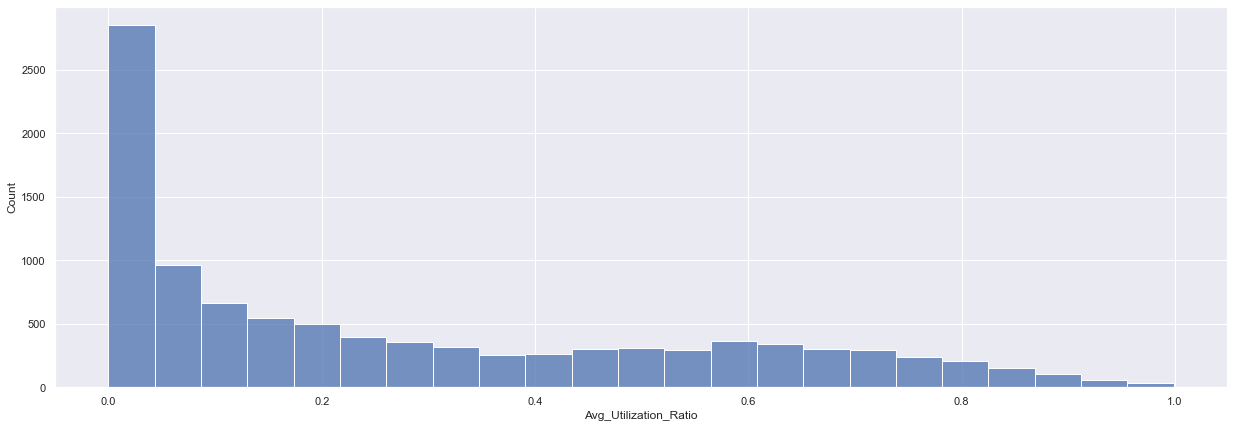

post-treatment, Avg_Utilization_Ratio
max:  0.707
min:  0.0


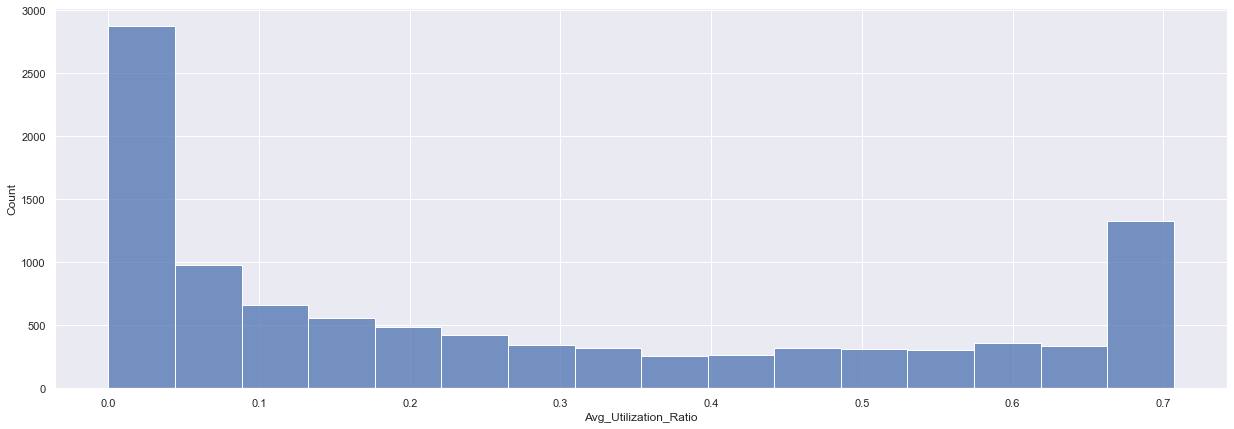

In [38]:
for col in float_col:
    data = df
    print("pre-treatment,", col)
    print("max: ", data[col].max())
    print("min: ", data[col].min())
    sns.histplot(data = data, x = col)
    plt.show()
    
    data = winsor_test_df
    print("post-treatment,", col)
    print("max: ", data[col].max())
    print("min: ", data[col].min())
    sns.histplot(data = data, x = col)
    plt.show()

I think my attempt at Winsorizing probably did more harm than good.  I'm going to proceed with just keeping the outliers as-is for now, but I can always come back and revisit this later if time permits and if I learn how to do this more elegantly.

### Feature Engineering

In [39]:
# I can't think of anything great to do for feature engineering at this point.  I don't know when I should or why.
#  I'll move forward with just trying to get the data to run through models, and then I'll add steps here if needed
#  just to get the data through the required steps.

### Prepare data for modeling
I'll put my functions that evaluate model performance here.# I'll put my functions that evaluate model performance here.<br>
It has nothing to do with preparing the data for modelling, but it prepares my notebook for the models.

In [40]:
def comparison_func(item1, item1_name, item2, item2_name, item1_source = "untreated model", item2_source = "downsampled model", bigger_is_better=1):
    if bigger_is_better:
        if item1 > item2:
            unformatted_msg = "\tthe {0} of {1} is bigger than the {2} of {3}; therefore, the\n\t{4} performs better than {5} here."
            formatted_msg = unformatted_msg.format(item1_name, round(item1, 5), item2_name, round(item2, 5), item1_source, item2_source)
            print(formatted_msg)

        elif round(item1, 5) == round(item2, 5):
            print("The {} performs the same as the {} here.".format(item1_source, item2_source))
        elif item1 < item2:
            unformatted_msg = "\tthe {0} of {1} is smaller than the {2} of {3}; therefore, the\n\t{4} performs better than {5} here."
            formatted_msg = unformatted_msg.format(item1_name, round(item1, 5), item2_name, round(item2, 5), item2_source, item1_source)
            print(formatted_msg)

    # If bigger isn't better, we re-run the function with some of the parameters reversed and bigger_is_better set to 1.
        #  Equivalent to minimizing a negative function instead of maximizing the function.        
    else:
        comparison_func(item1=item2,
                        item1_name=item2_name,
                        item2=item1,
                        item2_name=item1_name,
                        item1_source=item1_source,
                        item2_source=item2_source,
                        bigger_is_better=1)

I built the comparison_func() and the metric_score_comparisons() functions before remembering that there was a get_metrics_score() function that GreatLearning already made in the Ensemble_Hands-On_Bagging notebook (which I shamelessy used in Project 3...).

Anyway, I suppose these functions are an alternate implementation.  (If I had recalled the existence of "get_metrics_score()", I would have built my two functions
around that already existing one instead of the way that I did it...

In [41]:
def convoluted_suffix_logic(test_or_train, model1_alias, model2_alias):
    '''
    I wrote my function in a confusing way, and to make it so that I
    could reuse code in an easy way, I made the 'tot1' and 'tot2'
    variables that turn the test_or_train variables into
    suffixes to X_ and y_, I found myself with some pretty long
    code.  Rather than have that code repeated six times within the
    same function, I wrote this helper function to make the other
    function look cleaner.
    '''
    if test_or_train == "train":
        if model1_alias.find("upsampled") > 0:
            tot1 = test_or_train + "_upsampled"
        elif model1_alias.find("downsampled") > 0:
            tot1 = test_or_train + "_downsampled"
        else:
            tot1 = test_or_train
    
        if model2_alias.find("upsampled") > 0:
            tot2 = test_or_train + "_upsampled"
        elif model2_alias.find("downsampled") > 0:
            tot2 = test_or_train + "_downsampled"
        else:
            tot2 = test_or_train
    else:
        tot1 = test_or_train
        tot2 = test_or_train
    
    return(tot1, tot2)

In [52]:
def metric_score_comparisons(item1_source,
                             item2_source,
                             model1,
                             model2,
                             model1_alias,
                             model2_alias):
    
    # Train accuracy
    test_or_train = "train"
    (tot1, tot2) = convoluted_suffix_logic(test_or_train, model1_alias, model2_alias)
    metric = "accuracy"
    print("For {0} {1},".format(test_or_train, metric))
    comparison_func(item1 = model1.score(eval("X_{}".format(tot1)), eval("y_{}".format(tot1))),
                    item1_name = "{0} {1} {2}".format(item1_source, test_or_train, metric),
                    item2 = model2.score(eval("X_{}".format(tot2)), eval("y_{}".format(tot2))),
                    item2_name = "{0} {1} {2}".format(item2_source, test_or_train, metric),
                    item1_source = item1_source,
                    item2_source = item2_source) # bigger_is_better default
    
    # Test accuracy
    test_or_train = "test"
    (tot1, tot2) = convoluted_suffix_logic(test_or_train, model1_alias, model2_alias)
    metric = "accuracy"
    print("For {0} {1},".format(test_or_train, metric))
    comparison_func(item1 = model1.score(eval("X_{}".format(tot1)), eval("y_{}".format(tot1))),
                    item1_name = "{0} {1} {2}".format(item1_source, test_or_train, metric),
                    item2 = model2.score(eval("X_{}".format(tot2)), eval("y_{}".format(tot2))),
                    item2_name = "{0} {1} {2}".format(item2_source, test_or_train, metric),
                    item1_source = item1_source,
                    item2_source = item2_source) # bigger_is_better default
    
    # Recall
    test_or_train = "test"
    (tot1, tot2) = convoluted_suffix_logic(test_or_train, model1_alias, model2_alias)
    metric = "recall"
    print("For {0} {1},".format(test_or_train, metric))
    comparison_func(item1 = eval("{0}_score".format(metric))(eval("y_{}".format(tot1)), eval("y_predict_{}".format(model1_alias))),
                    item1_name = "{0} {1}".format(item1_source, metric),
                    item2 = eval("{0}_score".format(metric))(eval("y_{}".format(tot2)), eval("y_predict_{}".format(model2_alias))),
                    item2_name = "{0} {1}".format(item2_source, metric),
                    item1_source = item1_source,
                    item2_source = item2_source) # bigger_is_better default
    
    # Precision
    test_or_train = "test"
    (tot1, tot2) = convoluted_suffix_logic(test_or_train, model1_alias, model2_alias)
    metric = "precision"
    print("For {0} {1},".format(test_or_train, metric))
    comparison_func(item1 = eval("{0}_score".format(metric))(eval("y_{}".format(tot1)), eval("y_predict_{}".format(model1_alias))),
                    item1_name = "{0} {1}".format(item1_source, metric),
                    item2 = eval("{0}_score".format(metric))(eval("y_{}".format(tot2)), eval("y_predict_{}".format(model2_alias))),
                    item2_name = "{0} {1}".format(item2_source, metric),
                    item1_source = item1_source,
                    item2_source = item2_source) # bigger_is_better default
    
    # f1
    test_or_train = "test"
    (tot1, tot2) = convoluted_suffix_logic(test_or_train, model1_alias, model2_alias)
    metric = "f1"
    print("For {0} {1},".format(test_or_train, metric))
    comparison_func(item1 = eval("{0}_score".format(metric))(eval("y_{}".format(tot1)), eval("y_predict_{}".format(model1_alias))),
                    item1_name = "{0} {1}".format(item1_source, metric),
                    item2 = eval("{0}_score".format(metric))(eval("y_{}".format(tot2)), eval("y_predict_{}".format(model2_alias))),
                    item2_name = "{0} {1}".format(item2_source, metric),
                    item1_source = item1_source,
                    item2_source = item2_source) # bigger_is_better default

    # For AUC / AUROC / AUC ROC
    test_or_train = "test"
    (tot1, tot2) = convoluted_suffix_logic(test_or_train, model1_alias, model2_alias)
    metric = "roc_auc"
    print("For {0} {1},".format(test_or_train, metric))
    comparison_func(item1 = eval("{metric}_score(y_{tot1}, {model1_alias}.predict_proba(X_{tot1})[:, 1])".format(metric = metric, tot1 = tot1, model1_alias = model1_alias)),
                    item1_name = "{0} {1}".format(item1_source, metric),
                    item2 = eval("{metric}_score(y_{tot2}, {model2_alias}.predict_proba(X_{tot2})[:, 1])".format(metric = metric, tot2 = tot2, model2_alias = model2_alias)),
                    item2_name = "{0} {1}".format(item2_source, metric),
                    item1_source = item1_source,
                    item2_source = item2_source) # bigger_is_better default

I'm bringing in GreatLearning's get_metrics_score() function.  I forgot about it and built my own pairwise-comparison functions.  But I need it now because I need a concise way to store the results of multiple models so that I can make multi-way comparisons.

Again, if I'd remembered its existence before, I likely just would have built much simpler functions around this one.  But, instead of reworking the scratch-made functions again, I will just import this function and use my two functions mostly separately from this one.  Perhaps in project 5, I'll harmonize them...

In [43]:
# Source:  GreatLearning, Ensemble_Hands-On_Bagging notebook.

##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc, test_acc, train_recall, test_recall, train_precision, test_precision))
        
    # If the flag is set to True then only the following print statements will be displayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ", train_acc)
        print("Accuracy on test set : ", test_acc)
        print("Recall on training set : ", train_recall)
        print("Recall on test set : ", test_recall)
        print("Precision on training set : ", train_precision)
        print("Precision on test set : ", test_precision)
    
    return(score_list) # returning the list with train and test scores

In [44]:
## function to get confusion matrix in a proper format
#    I changed the default behavior of the confusion matrix to output as probabilities instead of counts.
#    Modified from original draw_cm from a GreatLearning notebook 'MLS_W2_Logistic_Reg.ipynb'
def draw_cm(actual, predicted, normalize_parameter = 'all'):
    cm = confusion_matrix(actual, predicted, normalize = normalize_parameter)
    sns.heatmap(cm, annot=True,  fmt='.3f', xticklabels = [0,1] , yticklabels = [0,1])
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

## Model building:  Logistic Regression - 6 pts

### Make a logistic regression model

In [45]:
logreg = LogisticRegression(random_state = 1)
logreg.fit(X_train, y_train)
y_predict_logreg = logreg.predict(X_test)

Confusion Matrix (in probabilities instead of counts)


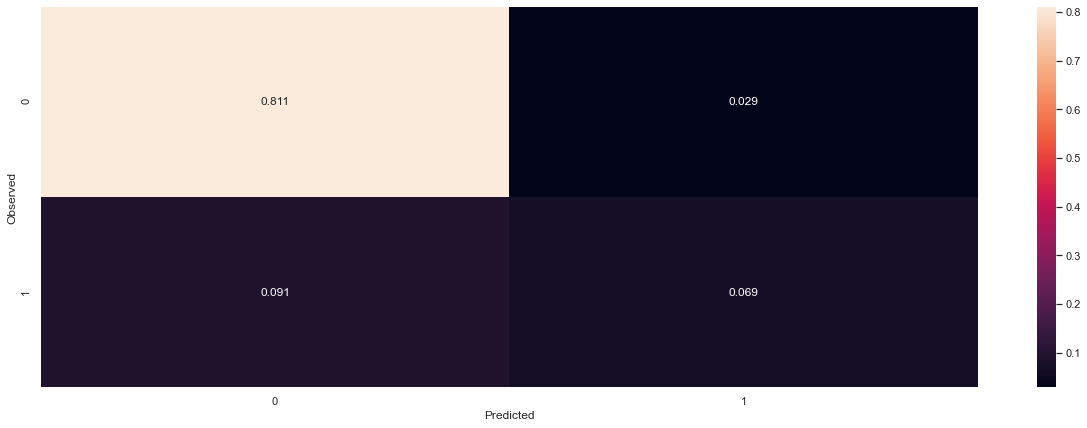

F1 Score: 0.5368956743002544
Roc Auc Score: 0.8905540096779789
Accuracy on training set :  0.8796557562076749
Accuracy on test set :  0.8802237578150708
Recall on training set :  0.43898156277436345
Recall on test set :  0.4323770491803279
Precision on training set :  0.7002801120448179
Precision on test set :  0.7080536912751678


In [46]:
# Using parts of code from two different notebooks to show both results.
#  (I might add the f1 score and roc auc score to the function next project
#   so that I can store the f1 score and roc auc score and have more concise code here.)

# This sequence from 'MLS_W2_Logistic_Reg.ipynb'
print('Confusion Matrix (in probabilities instead of counts)')
draw_cm(y_test, y_predict_logreg)  # This makes the confusion matrix.
print("F1 Score:", f1_score(y_test, y_predict_logreg))
print("Roc Auc Score:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]))

# This function first appeared in 'Ensemble_Hands-On_Bagging.ipynb'
logreg_score = get_metrics_score(logreg)

### Improve model performance by up and downsampling the data

In [47]:
# Downsampling
rus = RandomUnderSampler(random_state = 1)
X_train_downsampled, y_train_downsampled = rus.fit_resample(X_train, y_train)

In [48]:
# Checking to make sure that the downsampling occurred.
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_downsampled==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_downsampled==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_downsampled.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_downsampled.shape))

Before Under Sampling, counts of label 'Yes': 1139
Before Under Sampling, counts of label 'No': 5949 

After Under Sampling, counts of label 'Yes': 1139
After Under Sampling, counts of label 'No': 1139 

After Under Sampling, the shape of train_X: (2278, 19)
After Under Sampling, the shape of train_y: (2278,) 



In [49]:
logreg_downsampled = LogisticRegression(random_state = 1)
logreg_downsampled.fit(X_train_downsampled, y_train_downsampled)
y_predict_logreg_downsampled = logreg_downsampled.predict(X_test)

Confusion Matrix (in probabilities instead of counts)


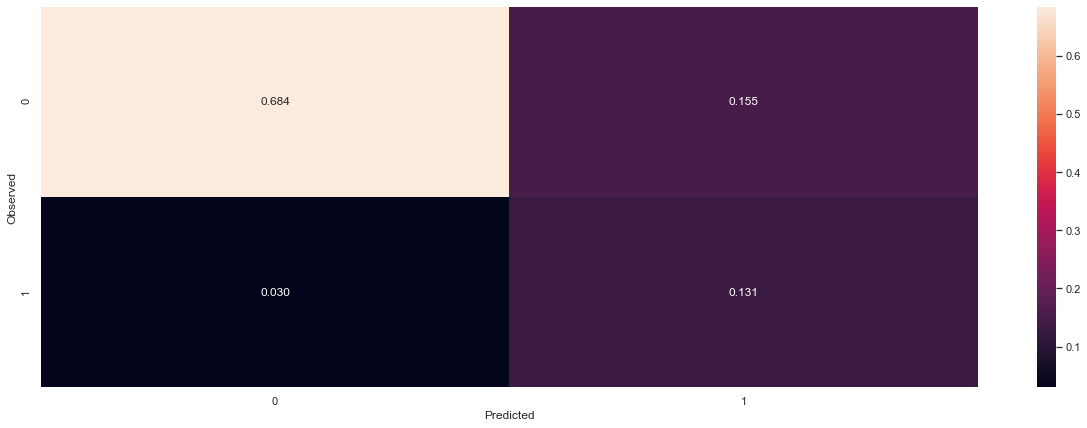

F1 Score: 0.5855457227138643
Roc Auc Score: 0.8967160097936522
Accuracy on training set :  0.8206828442437923
Accuracy on test set :  0.8150707469562356
Recall on training set :  0.8217734855136084
Recall on test set :  0.8135245901639344
Precision on training set :  0.46706586826347307
Precision on test set :  0.4573732718894009


In [50]:
print('Confusion Matrix (in probabilities instead of counts)')
draw_cm(y_test, y_predict_logreg_downsampled)  # This makes the confusion matrix.
print("F1 Score:", f1_score(y_test, y_predict_logreg_downsampled))
print("Roc Auc Score:", roc_auc_score(y_test, logreg_downsampled.predict_proba(X_test)[:, 1]))
logreg_downsampled_score = get_metrics_score(logreg_downsampled)

In [53]:
metric_score_comparisons(item1_source="untreated model",
                         item2_source="downsampled model",
                         model1=logreg,
                         model2=logreg_downsampled,
                         model1_alias = 'logreg',
                         model2_alias = 'logreg_downsampled')

For train accuracy,
	the untreated model train accuracy of 0.87966 is bigger than the downsampled model train accuracy of 0.81475; therefore, the
	untreated model performs better than downsampled model here.
For test accuracy,
	the untreated model test accuracy of 0.88022 is bigger than the downsampled model test accuracy of 0.81507; therefore, the
	untreated model performs better than downsampled model here.
For test recall,
	the untreated model recall of 0.43238 is smaller than the downsampled model recall of 0.81352; therefore, the
	downsampled model performs better than untreated model here.
For test precision,
	the untreated model precision of 0.70805 is bigger than the downsampled model precision of 0.45737; therefore, the
	untreated model performs better than downsampled model here.
For test f1,
	the untreated model f1 of 0.5369 is smaller than the downsampled model f1 of 0.58555; therefore, the
	downsampled model performs better than untreated model here.
For test roc_auc,
	the

In [54]:
# Upsampling
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Oversampling TEchnique
X_train_upsampled, y_train_upsampled = sm.fit_resample(X_train, y_train.ravel())

print("After UpSampling, counts of label '1': {}".format(sum(y_train_upsampled==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_upsampled==0)))

print('After UpSampling, the shape of train_X: {}'.format(X_train_upsampled.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_upsampled.shape))

Before UpSampling, counts of label '1': 1139
Before UpSampling, counts of label '0': 5949 

After UpSampling, counts of label '1': 5949
After UpSampling, counts of label '0': 5949 

After UpSampling, the shape of train_X: (11898, 19)
After UpSampling, the shape of train_y: (11898,) 



In [55]:
logreg_upsampled = LogisticRegression(random_state = 1)
logreg_upsampled.fit(X_train_upsampled, y_train_upsampled)
y_predict_logreg_upsampled = logreg_upsampled.predict(X_test)

Confusion Matrix (in probabilities instead of counts)


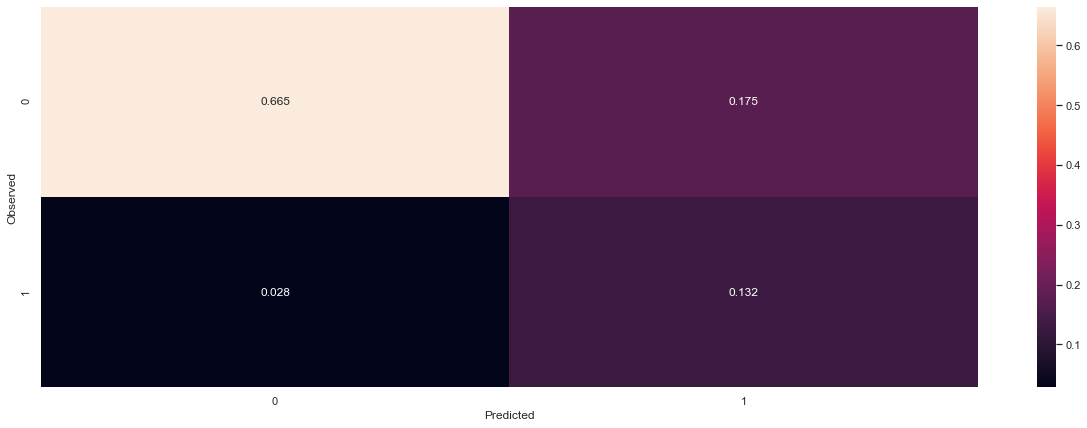

F1 Score: 0.565798733286418
Roc Auc Score: 0.883062572697303
Accuracy on training set :  0.8065744920993227
Accuracy on test set :  0.796972688384337
Recall on training set :  0.8208955223880597
Recall on test set :  0.8237704918032787
Precision on training set :  0.44481446241674594
Precision on test set :  0.43086816720257237


In [56]:
print('Confusion Matrix (in probabilities instead of counts)')
draw_cm(y_test, y_predict_logreg_upsampled)  # This makes the confusion matrix.
print("F1 Score:", f1_score(y_test, y_predict_logreg_upsampled))
print("Roc Auc Score:", roc_auc_score(y_test, logreg_upsampled.predict_proba(X_test)[:, 1]))
logreg_upsampled_score = get_metrics_score(logreg_upsampled)

In [57]:
metric_score_comparisons(item1_source="untreated model",
                         item2_source="upsampled model",
                         model1=logreg,
                         model2=logreg_upsampled,
                         model1_alias = 'logreg',
                         model2_alias = 'logreg_upsampled')

For train accuracy,
	the untreated model train accuracy of 0.87966 is bigger than the upsampled model train accuracy of 0.81938; therefore, the
	untreated model performs better than upsampled model here.
For test accuracy,
	the untreated model test accuracy of 0.88022 is bigger than the upsampled model test accuracy of 0.79697; therefore, the
	untreated model performs better than upsampled model here.
For test recall,
	the untreated model recall of 0.43238 is smaller than the upsampled model recall of 0.82377; therefore, the
	upsampled model performs better than untreated model here.
For test precision,
	the untreated model precision of 0.70805 is bigger than the upsampled model precision of 0.43087; therefore, the
	untreated model performs better than upsampled model here.
For test f1,
	the untreated model f1 of 0.5369 is smaller than the upsampled model f1 of 0.5658; therefore, the
	upsampled model performs better than untreated model here.
For test roc_auc,
	the untreated model roc_

In [58]:
# I want to see how the downsampled and upsampled models compare.
metric_score_comparisons(item1_source="downsampled model",
                         item2_source="upsampled model",
                         model1=logreg_downsampled,
                         model2=logreg_upsampled,
                         model1_alias = 'logreg_downsampled',
                         model2_alias = 'logreg_upsampled')

For train accuracy,
	the downsampled model train accuracy of 0.81475 is smaller than the upsampled model train accuracy of 0.81938; therefore, the
	upsampled model performs better than downsampled model here.
For test accuracy,
	the downsampled model test accuracy of 0.81507 is bigger than the upsampled model test accuracy of 0.79697; therefore, the
	downsampled model performs better than upsampled model here.
For test recall,
	the downsampled model recall of 0.81352 is smaller than the upsampled model recall of 0.82377; therefore, the
	upsampled model performs better than downsampled model here.
For test precision,
	the downsampled model precision of 0.45737 is bigger than the upsampled model precision of 0.43087; therefore, the
	downsampled model performs better than upsampled model here.
For test f1,
	the downsampled model f1 of 0.58555 is bigger than the upsampled model f1 of 0.5658; therefore, the
	downsampled model performs better than upsampled model here.
For test roc_auc,
	the

It's interesting that the models end up performing about the same.  They alternate between upsampled winning and downsampled winning across almost every other comparison.  The metrics are also very close, almost a toss-up, in each case.

### Regularize above models, if required

#### We don't need to regularize scikit learn's logistic regression because it is regularized by default. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#### I will de-regularize the logistic regression and compare it to the regularized one we produced by default just to try it below.

In [59]:
logreg_irregular = LogisticRegression(penalty='none', random_state = 1)
logreg_irregular.fit(X_train, y_train)

y_predict_logreg_irregular = logreg_irregular.predict(X_test)

Confusion Matrix (in probabilities instead of counts)


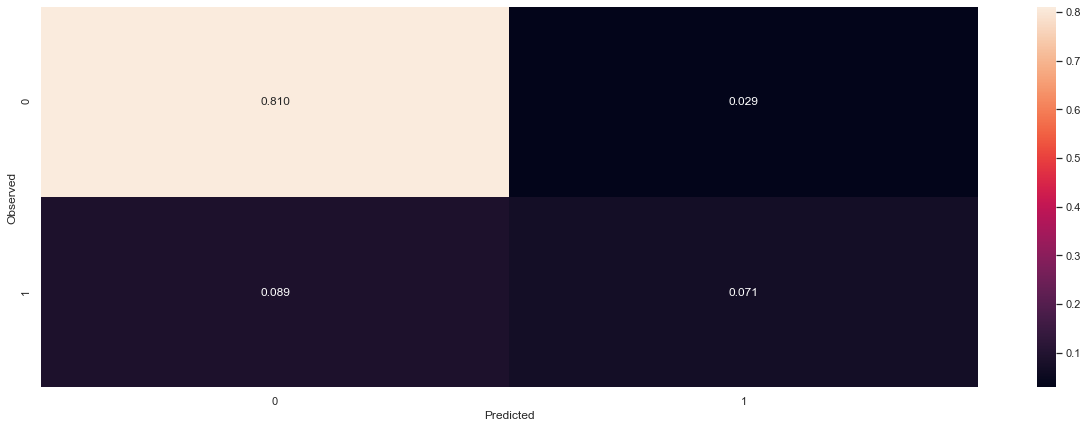

F1 Score: 0.5472887767969735
Roc Auc Score: 0.8906680761642816
Accuracy on training set :  0.8821952595936795
Accuracy on test set :  0.8818690358670616
Recall on training set :  0.45390693590869186
Recall on test set :  0.444672131147541
Precision on training set :  0.7082191780821918
Precision on test set :  0.7114754098360656


In [60]:
print('Confusion Matrix (in probabilities instead of counts)')
draw_cm(y_test, y_predict_logreg_irregular)  # This makes the confusion matrix.
print("F1 Score:", f1_score(y_test, y_predict_logreg_irregular))
print("Roc Auc Score:", roc_auc_score(y_test, logreg_irregular.predict_proba(X_test)[:, 1]))
logreg_irregular_score = get_metrics_score(logreg_irregular)

In [61]:
metric_score_comparisons(model1=logreg,
                         model2=logreg_irregular,
                         model1_alias = 'logreg',
                         model2_alias = 'logreg_irregular',
                         item1_source="default, regularized model",
                         item2_source="non-regularized model")

For train accuracy,
	the default, regularized model train accuracy of 0.87966 is smaller than the non-regularized model train accuracy of 0.8822; therefore, the
	non-regularized model performs better than default, regularized model here.
For test accuracy,
	the default, regularized model test accuracy of 0.88022 is smaller than the non-regularized model test accuracy of 0.88187; therefore, the
	non-regularized model performs better than default, regularized model here.
For test recall,
	the default, regularized model recall of 0.43238 is smaller than the non-regularized model recall of 0.44467; therefore, the
	non-regularized model performs better than default, regularized model here.
For test precision,
	the default, regularized model precision of 0.70805 is smaller than the non-regularized model precision of 0.71148; therefore, the
	non-regularized model performs better than default, regularized model here.
For test f1,
	the default, regularized model f1 of 0.5369 is smaller than the

### It is interesting that the non-regularized model performs better across the board.  <br>It is especially interesting for the testing accuracy since that is the case for which regularization is supposed to help.

## Model building:  Bagging and Boosting - 8 pts

### Build Decision tree, random forest, bagging classifier models

#### Decision Tree

In [71]:
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)

#dtree_score=get_metrics_score(dtree)
y_predict_dtree = dtree.predict(X_test)

Confusion Matrix (in probabilities instead of counts)


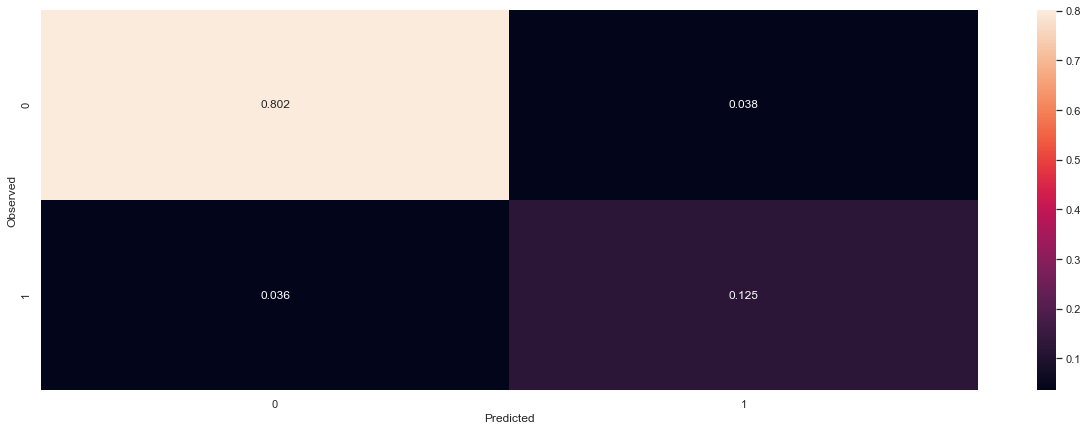

Precision: 0.768762677484787
F1 Score: 0.7726809378185525
Accuracy on training set :  1.0
Accuracy on test set :  0.926620598881211
Recall on training set :  1.0
Recall on test set :  0.7766393442622951
Precision on training set :  1.0
Precision on test set :  0.768762677484787


In [72]:
print('Confusion Matrix (in probabilities instead of counts)')
draw_cm(y_test, y_predict_dtree)  # This makes the confusion matrix.
print("Precision:", precision_score(y_test, y_predict_dtree))
print("F1 Score:", f1_score(y_test, y_predict_dtree))
dtree_score = get_metrics_score(dtree)

In [76]:
metric_score_comparisons(model1=logreg,
                         model2=dtree,
                         model1_alias='logreg',
                         model2_alias='dtree',
                         item1_source="logistic regression",
                         item2_source="decision tree")

For train accuracy,
	the logistic regression train accuracy of 0.87966 is smaller than the decision tree train accuracy of 1.0; therefore, the
	decision tree performs better than logistic regression here.
For test accuracy,
	the logistic regression test accuracy of 0.88022 is smaller than the decision tree test accuracy of 0.92662; therefore, the
	decision tree performs better than logistic regression here.
For test recall,
	the logistic regression recall of 0.43238 is smaller than the decision tree recall of 0.77664; therefore, the
	decision tree performs better than logistic regression here.
For test precision,
	the logistic regression precision of 0.70805 is smaller than the decision tree precision of 0.76876; therefore, the
	decision tree performs better than logistic regression here.
For test f1,
	the logistic regression f1 of 0.5369 is smaller than the decision tree f1 of 0.77268; therefore, the
	decision tree performs better than logistic regression here.
For test roc_auc,
	the 

#### Random Forest

In [74]:
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

y_predict_rf = rf.predict(X_test)

Confusion Matrix (in probabilities instead of counts)


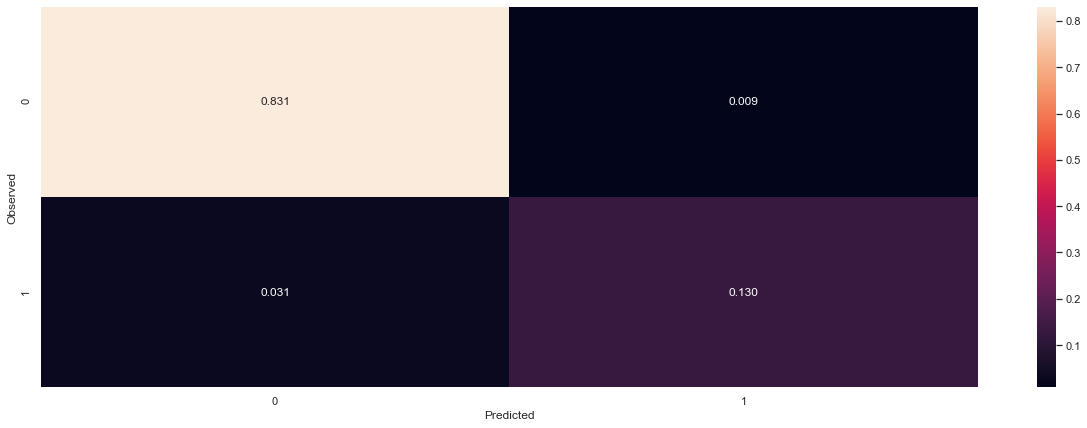

Precision: 0.9360189573459715
F1 Score: 0.8681318681318682
Accuracy on training set :  1.0
Accuracy on test set :  0.9605133267522211
Recall on training set :  1.0
Recall on test set :  0.8094262295081968
Precision on training set :  1.0
Precision on test set :  0.9360189573459715


In [75]:
print('Confusion Matrix (in probabilities instead of counts)')
draw_cm(y_test, y_predict_rf)  # This makes the confusion matrix.
print("Precision:", precision_score(y_test, y_predict_rf))
print("F1 Score:", f1_score(y_test, y_predict_rf))
rf_score = get_metrics_score(rf)

In [79]:
metric_score_comparisons(model1=rf,
                         model2=dtree,
                         model1_alias='rf',
                         model2_alias='dtree',
                         item1_source="random forest",
                         item2_source="decision tree")

For train accuracy,
The random forest performs the same as the decision tree here.
For test accuracy,
	the random forest test accuracy of 0.96051 is bigger than the decision tree test accuracy of 0.92662; therefore, the
	random forest performs better than decision tree here.
For test recall,
	the random forest recall of 0.80943 is bigger than the decision tree recall of 0.77664; therefore, the
	random forest performs better than decision tree here.
For test precision,
	the random forest precision of 0.93602 is bigger than the decision tree precision of 0.76876; therefore, the
	random forest performs better than decision tree here.
For test f1,
	the random forest f1 of 0.86813 is bigger than the decision tree f1 of 0.77268; therefore, the
	random forest performs better than decision tree here.
For test roc_auc,
	the random forest roc_auc of 0.98787 is bigger than the decision tree roc_auc of 0.86598; therefore, the
	random forest performs better than decision tree here.


#### Bagging Classifier

In [80]:
#base_estimator for bagging classifier is a decision tree by default
bagging_classifier=BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

y_predict_bagging_classifier = bagging_classifier.predict(X_test)

Confusion Matrix (in probabilities instead of counts)


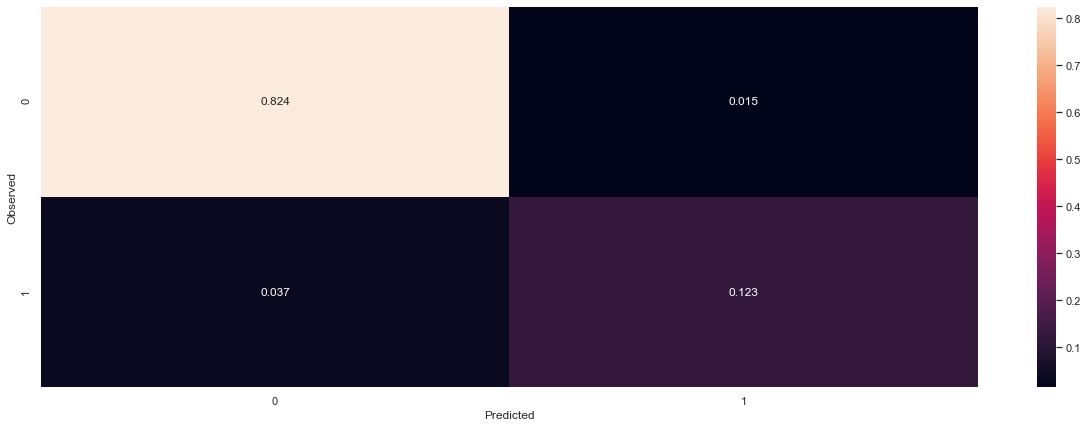

Precision: 0.8907363420427553
F1 Score: 0.825082508250825
Accuracy on training set :  0.9959085778781038
Accuracy on test set :  0.947680157946693
Recall on training set :  0.9771729587357331
Recall on test set :  0.7684426229508197
Precision on training set :  0.9973118279569892
Precision on test set :  0.8907363420427553


In [81]:
print('Confusion Matrix (in probabilities instead of counts)')
draw_cm(y_test, y_predict_bagging_classifier)  # This makes the confusion matrix.
print("Precision:", precision_score(y_test, y_predict_bagging_classifier))
print("F1 Score:", f1_score(y_test, y_predict_bagging_classifier))
bagging_classifier_score = get_metrics_score(bagging_classifier)

In [85]:
metric_score_comparisons(model1=bagging_classifier,
                         model2=dtree,
                         model1_alias='bagging_classifier',
                         model2_alias='dtree',
                         item1_source="bagging classifier",
                         item2_source="decision tree")

For train accuracy,
	the bagging classifier train accuracy of 0.99591 is smaller than the decision tree train accuracy of 1.0; therefore, the
	decision tree performs better than bagging classifier here.
For test accuracy,
	the bagging classifier test accuracy of 0.94768 is bigger than the decision tree test accuracy of 0.92662; therefore, the
	bagging classifier performs better than decision tree here.
For test recall,
	the bagging classifier recall of 0.76844 is smaller than the decision tree recall of 0.77664; therefore, the
	decision tree performs better than bagging classifier here.
For test precision,
	the bagging classifier precision of 0.89074 is bigger than the decision tree precision of 0.76876; therefore, the
	bagging classifier performs better than decision tree here.
For test f1,
	the bagging classifier f1 of 0.82508 is bigger than the decision tree f1 of 0.77268; therefore, the
	bagging classifier performs better than decision tree here.
For test roc_auc,
	the bagging clas

### Build Xgboost, AdaBoost, and gradient boosting models

#### Xgboost

In [87]:
xgb = XGBClassifier(random_state=1, eval_metric = 'logloss')
xgb.fit(X_train,y_train)

y_predict_xgb = xgb.predict(X_test)

Confusion Matrix (in probabilities instead of counts)


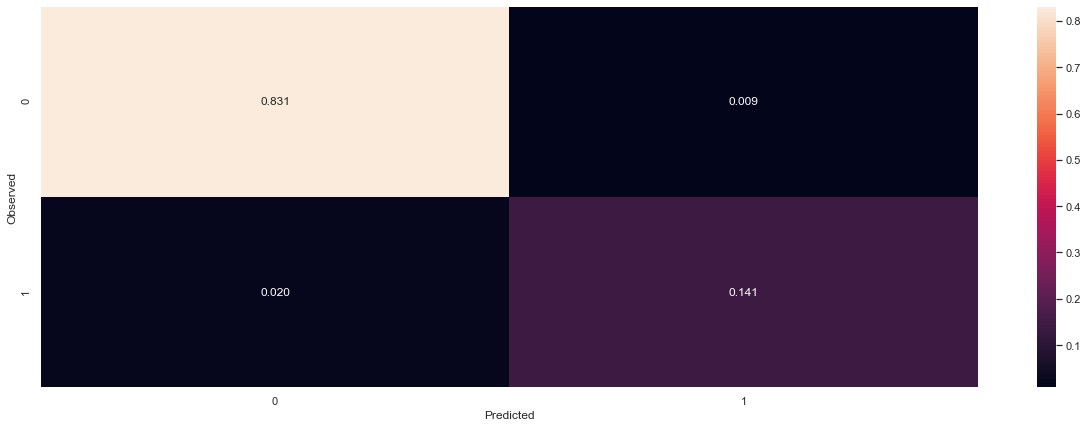

Precision: 0.9406593406593406
F1 Score: 0.9077412513255567
Accuracy on training set :  1.0
Accuracy on test set :  0.9713721618953604
Recall on training set :  1.0
Recall on test set :  0.8770491803278688
Precision on training set :  1.0
Precision on test set :  0.9406593406593406


In [90]:
print('Confusion Matrix (in probabilities instead of counts)')
draw_cm(y_test, y_predict_xgb)  # This makes the confusion matrix.
print("Precision:", precision_score(y_test, y_predict_xgb))
print("F1 Score:", f1_score(y_test, y_predict_xgb))
xgb_score = get_metrics_score(xgb)

In [89]:
metric_score_comparisons(model1=bagging_classifier,
                         model2=xgb,
                         model1_alias='bagging_classifier',
                         model2_alias='xgb',
                         item1_source="bagging classifier",
                         item2_source="XGBoost model")

For train accuracy,
	the bagging classifier train accuracy of 0.99591 is smaller than the XGBoost model train accuracy of 1.0; therefore, the
	XGBoost model performs better than bagging classifier here.
For test accuracy,
	the bagging classifier test accuracy of 0.94768 is smaller than the XGBoost model test accuracy of 0.97137; therefore, the
	XGBoost model performs better than bagging classifier here.
For test recall,
	the bagging classifier recall of 0.76844 is smaller than the XGBoost model recall of 0.87705; therefore, the
	XGBoost model performs better than bagging classifier here.
For test precision,
	the bagging classifier precision of 0.89074 is smaller than the XGBoost model precision of 0.94066; therefore, the
	XGBoost model performs better than bagging classifier here.
For test f1,
	the bagging classifier f1 of 0.82508 is smaller than the XGBoost model f1 of 0.90774; therefore, the
	XGBoost model performs better than bagging classifier here.
For test roc_auc,
	the bagging c

#### AdaBoost

In [91]:
adaboost=AdaBoostClassifier(random_state=1)
adaboost.fit(X_train,y_train)

y_predict_adaboost = adaboost.predict(X_test)

Confusion Matrix (in probabilities instead of counts)


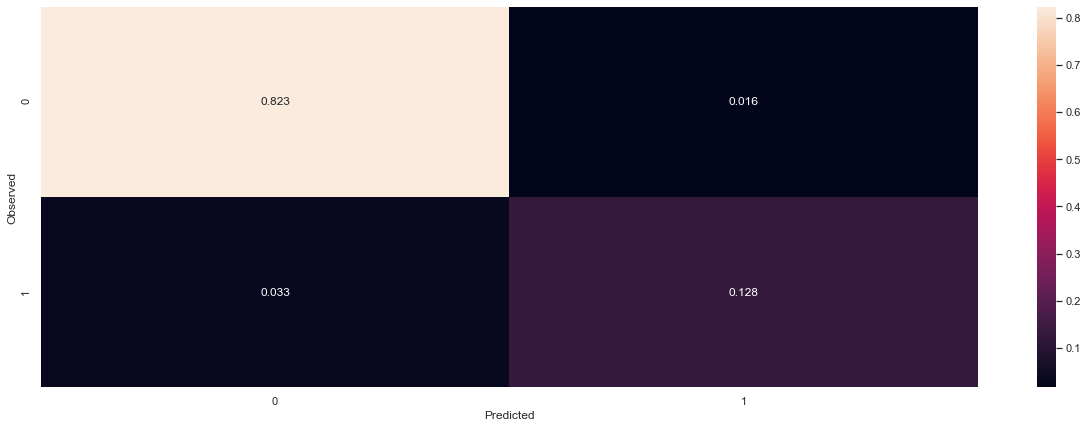

Precision: 0.8861047835990888
F1 Score: 0.8392664509169363
Accuracy on training set :  0.9651523702031602
Accuracy on test set :  0.9509707140506746
Recall on training set :  0.8647936786654961
Recall on test set :  0.7971311475409836
Precision on training set :  0.9137291280148423
Precision on test set :  0.8861047835990888


In [92]:
print('Confusion Matrix (in probabilities instead of counts)')
draw_cm(y_test, y_predict_adaboost)  # This makes the confusion matrix.
print("Precision:", precision_score(y_test, y_predict_adaboost))
print("F1 Score:", f1_score(y_test, y_predict_adaboost))
adaboost_score = get_metrics_score(adaboost)

In [93]:
metric_score_comparisons(model1=adaboost,
                         model2=xgb,
                         model1_alias='adaboost',
                         model2_alias='xgb',
                         item1_source="adaboost model",
                         item2_source="XGBoost model")

For train accuracy,
	the adaboost model train accuracy of 0.96515 is smaller than the XGBoost model train accuracy of 1.0; therefore, the
	XGBoost model performs better than adaboost model here.
For test accuracy,
	the adaboost model test accuracy of 0.95097 is smaller than the XGBoost model test accuracy of 0.97137; therefore, the
	XGBoost model performs better than adaboost model here.
For test recall,
	the adaboost model recall of 0.79713 is smaller than the XGBoost model recall of 0.87705; therefore, the
	XGBoost model performs better than adaboost model here.
For test precision,
	the adaboost model precision of 0.8861 is smaller than the XGBoost model precision of 0.94066; therefore, the
	XGBoost model performs better than adaboost model here.
For test f1,
	the adaboost model f1 of 0.83927 is smaller than the XGBoost model f1 of 0.90774; therefore, the
	XGBoost model performs better than adaboost model here.
For test roc_auc,
	the adaboost model roc_auc of 0.98301 is smaller than 

#### Gradient Boosting

In [94]:
gbm=GradientBoostingClassifier(random_state=1)
gbm.fit(X_train,y_train)

y_predict_gbm = gbm.predict(X_test)

Confusion Matrix (in probabilities instead of counts)


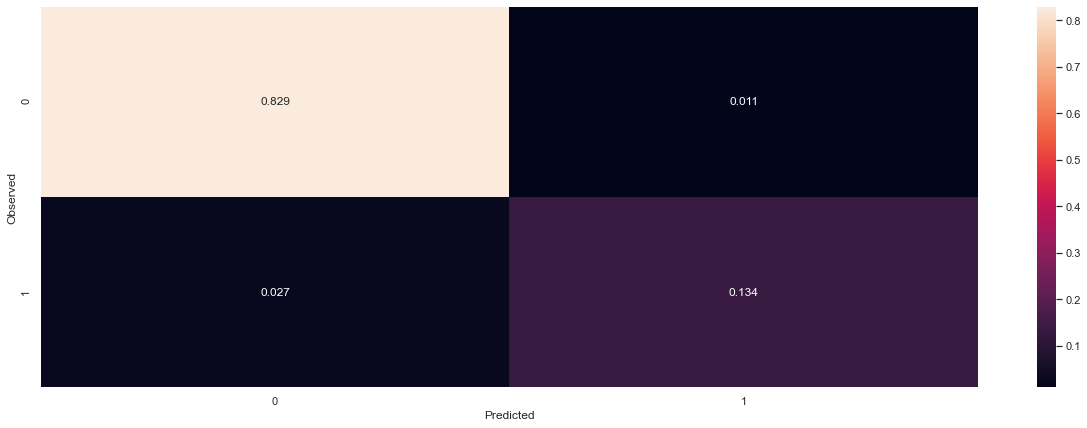

Precision: 0.9269406392694064
F1 Score: 0.8768898488120951
Accuracy on training set :  0.9784142212189616
Accuracy on test set :  0.9624876604146101
Recall on training set :  0.8981562774363476
Recall on test set :  0.8319672131147541
Precision on training set :  0.9650943396226415
Precision on test set :  0.9269406392694064


In [95]:
print('Confusion Matrix (in probabilities instead of counts)')
draw_cm(y_test, y_predict_gbm)  # This makes the confusion matrix.
print("Precision:", precision_score(y_test, y_predict_gbm))
print("F1 Score:", f1_score(y_test, y_predict_gbm))
gbm_score = get_metrics_score(gbm)

In [96]:
metric_score_comparisons(model1=gbm,
                         model2=xgb,
                         model1_alias='gbm',
                         model2_alias='xgb',
                         item1_source="gradient boosting machine",
                         item2_source="XGBoost model")

For train accuracy,
	the gradient boosting machine train accuracy of 0.97841 is smaller than the XGBoost model train accuracy of 1.0; therefore, the
	XGBoost model performs better than gradient boosting machine here.
For test accuracy,
	the gradient boosting machine test accuracy of 0.96249 is smaller than the XGBoost model test accuracy of 0.97137; therefore, the
	XGBoost model performs better than gradient boosting machine here.
For test recall,
	the gradient boosting machine recall of 0.83197 is smaller than the XGBoost model recall of 0.87705; therefore, the
	XGBoost model performs better than gradient boosting machine here.
For test precision,
	the gradient boosting machine precision of 0.92694 is smaller than the XGBoost model precision of 0.94066; therefore, the
	XGBoost model performs better than gradient boosting machine here.
For test f1,
	the gradient boosting machine f1 of 0.87689 is smaller than the XGBoost model f1 of 0.90774; therefore, the
	XGBoost model performs better

## Hyperparameter tuning using grid search - 8 pts

### Tune the best 3 models using grid search and provide the reason behind choosing those models

In [122]:
column_labels = ['train_accuracy', 'test_accuracy', 'train_recall', 'test_recall', 'train_precision', 'test_precision']
row_labels = ['logreg_score', 'logreg_downsampled_score', 'logreg_upsampled_score', 'logreg_irregular_score',
              'dtree_score', 'rf_score', 'bagging_classifier_score', 'xgb_score', 'adaboost_score', 'gbm_score']

all_scores = pd.DataFrame(list(zip(logreg_score, logreg_downsampled_score, logreg_upsampled_score, logreg_irregular_score,
                                   dtree_score, rf_score, bagging_classifier_score, xgb_score, adaboost_score, gbm_score)))
all_scores = all_scores.T
all_scores.columns = column_labels
all_scores.index = row_labels

In [119]:
# By recall scores
all_scores.sort_values(by=['test_recall', 'test_accuracy', 'test_precision'], ascending=False)

train_accuracy  test_accuracy  train_recall  \
xgb_score                       1.000000       0.971372      1.000000   
gbm_score                       0.978414       0.962488      0.898156   
logreg_upsampled_score          0.806574       0.796973      0.820896   
logreg_downsampled_score        0.820683       0.815071      0.821773   
rf_score                        1.000000       0.960513      1.000000   
adaboost_score                  0.965152       0.950971      0.864794   
dtree_score                     1.000000       0.926621      1.000000   
bagging_classifier_score        0.995909       0.947680      0.977173   
logreg_irregular_score          0.882195       0.881869      0.453907   
logreg_score                    0.879656       0.880224      0.438982   

                          test_recall  train_precision  test_precision  
xgb_score                    0.877049         1.000000        0.940659  
gbm_score                    0.831967         0.965094        0.926941  
logreg_upsampled_score       0.823770         0.444814        0.430868  
logreg_downsampled_score     0.813525         0.467066        0.457373  
rf_score                     0.809426         1.000000        0.936019  
adaboost_score               0.797131         0.913729        0.886105  
dtree_score                  0.776639         1.000000        0.768763  
bagging_classifier_score     0.768443         0.997312        0.890736  
logreg_irregular_score       0.444672         0.708219        0.711475  
logreg_score                 0.432377         0.700280        0.708054

In [120]:
# By accuracy
all_scores.sort_values(by=['test_accuracy', 'test_precision'], ascending=False)

train_accuracy  test_accuracy  train_recall  \
xgb_score                       1.000000       0.971372      1.000000   
gbm_score                       0.978414       0.962488      0.898156   
rf_score                        1.000000       0.960513      1.000000   
adaboost_score                  0.965152       0.950971      0.864794   
bagging_classifier_score        0.995909       0.947680      0.977173   
dtree_score                     1.000000       0.926621      1.000000   
logreg_irregular_score          0.882195       0.881869      0.453907   
logreg_score                    0.879656       0.880224      0.438982   
logreg_downsampled_score        0.820683       0.815071      0.821773   
logreg_upsampled_score          0.806574       0.796973      0.820896   

                          test_recall  train_precision  test_precision  
xgb_score                    0.877049         1.000000        0.940659  
gbm_score                    0.831967         0.965094        0.926941  
rf_score                     0.809426         1.000000        0.936019  
adaboost_score               0.797131         0.913729        0.886105  
bagging_classifier_score     0.768443         0.997312        0.890736  
dtree_score                  0.776639         1.000000        0.768763  
logreg_irregular_score       0.444672         0.708219        0.711475  
logreg_score                 0.432377         0.700280        0.708054  
logreg_downsampled_score     0.813525         0.467066        0.457373  
logreg_upsampled_score       0.823770         0.444814        0.430868

In [131]:
print("I think that recall is the most important in this case, so I will choose these three models.")

# By recall scores
top3_recall = all_scores.sort_values(by=['test_recall', 'test_accuracy', 'test_precision'], ascending=False).iloc[0:3,:].index.to_list()
for model in top3_recall:
    print("\t" + model)

I think that recall is the most important in this case, so I will choose these three models.
	xgb_score
	gbm_score
	logreg_upsampled_score


### Use pipelines in hyperparameter tuning

In [141]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), xgb)

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__gamma': 5, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 250, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.7} with CV score=0.9525852075121725:
Wall time: 1h 36min 15s


In [179]:
# Creating new pipeline with best parameters
xgb_tuned_grid = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=250,
                scale_pos_weight=10,
                gamma=5,
                subsample=0.7,
                learning_rate= 0.01,
                eval_metric='logloss'
                
            )
        )
    ]
)
# Fit the model on training data
xgb_tuned_grid.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=250,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.7, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [204]:
type(xgb_tuned_grid)

sklearn.pipeline.Pipeline

In [180]:
y_predict_xgb_tuned_grid = xgb_tuned_grid.predict(X_test)

Confusion Matrix (in probabilities instead of counts)


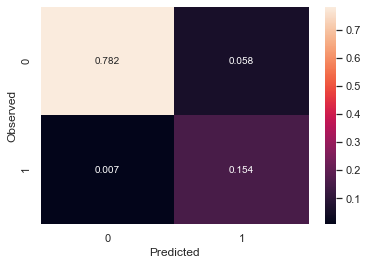

Precision: 0.7262830482115086
F1 Score: 0.825817860300619
Accuracy on training set :  0.9547121896162528
Accuracy on test set :  0.935176044751563
Recall on training set :  0.9982440737489026
Recall on test set :  0.9569672131147541
Precision on training set :  0.7809065934065934
Precision on test set :  0.7262830482115086


In [181]:
print('Confusion Matrix (in probabilities instead of counts)')
draw_cm(y_test, y_predict_xgb_tuned_grid)  # This makes the confusion matrix.
print("Precision:", precision_score(y_test, y_predict_xgb_tuned_grid))
print("F1 Score:", f1_score(y_test, y_predict_xgb_tuned_grid))
xgb_tuned_grid_score = get_metrics_score(xgb_tuned_grid)

In [163]:
%%time 

#Creating pipeline

#pipe=make_pipeline(StandardScaler(), GradientBoostingClassifier())
#pipe=make_pipeline(GradientBoostingClassifier())
pipe=make_pipeline(StandardScaler(), gbm)
#pipe=make_pipeline(gbm)

#Parameter grid to pass in GridSearchCV

# I originally made this param_grid, but then I realized after a few hours that it would likely take me 12 hours to do such an extensive search
# (estimating based on the number of permutations per minute that the xgbclassifier went through above)
# param_grid={'gradientboostingclassifier__n_estimators':np.arange(50,300,50),
#             'gradientboostingclassifier__learning_rate':[0.01,0.1,0.2,0.05],
#             'gradientboostingclassifier__min_samples_split':np.linspace(0.1, 0.5, 5),
#             'gradientboostingclassifier__min_samples_leaf':np.linspace(0.1, 0.5, 5),
#             'gradientboostingclassifier__max_depth':[3,5,8],
#             'gradientboostingclassifier__max_features':["log2", "sqrt"],
#             'gradientboostingclassifier__subsample':[0.7,0.8,0.9,1]
#            }

# pared this down so that I can finish the project today.  (Estimated in 1h, 40m using same speed per permutation as in xgboost)
#  Only took 20 minutes instead!
param_grid={'gradientboostingclassifier__n_estimators':np.arange(50,300,50),
            'gradientboostingclassifier__learning_rate':[0.01,0.1,0.2],
            'gradientboostingclassifier__min_samples_split':np.linspace(0.1, 0.5, 3),
            'gradientboostingclassifier__min_samples_leaf':np.linspace(0.1, 0.5, 3),
            'gradientboostingclassifier__max_depth':[3,8],
            'gradientboostingclassifier__max_features':["log2", "sqrt"],
            'gradientboostingclassifier__subsample':[0.7,0.85,1]
           }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'gradientboostingclassifier__learning_rate': 0.2, 'gradientboostingclassifier__max_depth': 8, 'gradientboostingclassifier__max_features': 'log2', 'gradientboostingclassifier__min_samples_leaf': 0.1, 'gradientboostingclassifier__min_samples_split': 0.30000000000000004, 'gradientboostingclassifier__n_estimators': 250, 'gradientboostingclassifier__subsample': 1} with CV score=0.8586560012365716:
Wall time: 20min 27s


In [186]:
# Creating new pipeline with best parameters
gbm_tuned_grid = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "GBM",
            GradientBoostingClassifier(
                random_state=1,
                max_depth=8,
                max_features='log2',
                min_samples_leaf=0.1,
                min_samples_split=0.3,
                n_estimators=250,
                subsample=1,
                learning_rate= 0.2                
            )
        )
    ]
)
# Fit the model on training data
gbm_tuned_grid.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('GBM',
                 GradientBoostingClassifier(learning_rate=0.2, max_depth=8,
                                            max_features='log2',
                                            min_samples_leaf=0.1,
                                            min_samples_split=0.3,
                                            n_estimators=250, random_state=1,
                                            subsample=1))])

Confusion Matrix (in probabilities instead of counts)


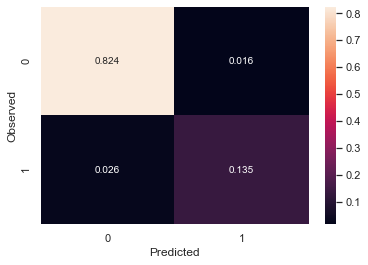

Precision: 0.8951965065502183
F1 Score: 0.8668076109936574
Accuracy on training set :  0.9795428893905191
Accuracy on test set :  0.9585389930898321
Recall on training set :  0.9183494293239683
Recall on test set :  0.8401639344262295
Precision on training set :  0.9526411657559198
Precision on test set :  0.8951965065502183


In [187]:
y_predict_gbm_tuned_grid = gbm_tuned_grid.predict(X_test)
print('Confusion Matrix (in probabilities instead of counts)')
draw_cm(y_test, y_predict_gbm_tuned_grid)  # This makes the confusion matrix.
print("Precision:", precision_score(y_test, y_predict_gbm_tuned_grid))
print("F1 Score:", f1_score(y_test, y_predict_gbm_tuned_grid))
gbm_tuned_grid_score = get_metrics_score(gbm_tuned_grid)

There aren't as many parameters to tune for logistic regression, so the grid search is a lot faster.

Perhaps in a different setting, I would also go and tune my upsampling and downsampling techniques to get the optimal formulation there as well.

In [170]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), logreg_upsampled)

#Parameter grid to pass in GridSearchCV
param_grid={'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'logisticregression__penalty':['l1', 'l2', 'elasticnet', 'none'],
            'logisticregression__C':[100, 10, 1.0, 0.1, 0.01]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train_upsampled,y_train_upsampled)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'logisticregression__C': 100, 'logisticregression__penalty': 'none', 'logisticregression__solver': 'newton-cg'} with CV score=0.8741059148638429:
Wall time: 17.6 s


In [188]:
# Creating new pipeline with best parameters
logreg_upsampled_tuned_grid = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "logreg_upsampled",
            LogisticRegression(
                random_state=1,
                C=100,
                penalty='none',
                solver='newton-cg'
            )
        )
    ]
)
# Fit the model on training data
logreg_upsampled_tuned_grid.fit(X_train_upsampled, y_train_upsampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg_upsampled',
                 LogisticRegression(C=100, penalty='none', random_state=1,
                                    solver='newton-cg'))])

Confusion Matrix (in probabilities instead of counts)


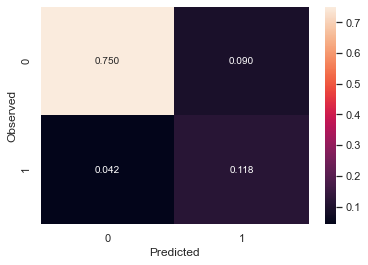

Precision: 0.569620253164557
F1 Score: 0.6428571428571429
Accuracy on training set :  0.8726015801354402
Accuracy on test set :  0.8683777558407371
Recall on training set :  0.7647058823529411
Recall on test set :  0.7377049180327869
Precision on training set :  0.5783532536520585
Precision on test set :  0.569620253164557


In [189]:
y_predict_logreg_upsampled_tuned_grid = logreg_upsampled_tuned_grid.predict(X_test)
print('Confusion Matrix (in probabilities instead of counts)')
draw_cm(y_test, y_predict_logreg_upsampled_tuned_grid)  # This makes the confusion matrix.
print("Precision:", precision_score(y_test, y_predict_logreg_upsampled_tuned_grid))
print("F1 Score:", f1_score(y_test, y_predict_logreg_upsampled_tuned_grid))
logreg_upsampled_tuned_grid_score = get_metrics_score(logreg_upsampled_tuned_grid)

## Hyperparameter tuning using random search - 8 pts

### Tune the best 3 models using random search and provide the reason behind choosing those models

In [172]:
print("I think that recall is the most important in this case, so I will choose these three models.\nThese are the same three models used for the grid search.")

# By recall scores
top3_recall = all_scores.sort_values(by=['test_recall', 'test_accuracy', 'test_precision'], ascending=False).iloc[0:3,:].index.to_list()
for model in top3_recall:
    print("\t" + model)

I think that recall is the most important in this case, so I will choose these three models.
These are the same three models used for the grid search.
	xgb_score
	gbm_score
	logreg_upsampled_score


### Use pipelines in hyperparameter tuning

##### XGBoost

In [175]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), xgb)

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 0.7, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__n_estimators': 150, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__gamma': 3} with CV score=0.9446788778112681:
Wall time: 4min 51s


In [190]:
# Creating new pipeline with best parameters
xgb_tuned_random = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=150,
                scale_pos_weight=10,
                gamma=3,
                subsample=0.7,
                learning_rate= 0.05,
                eval_metric='logloss'
            )
        )
    ]
)
# Fit the model on training data
xgb_tuned_random.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=3, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=150,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.7, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Confusion Matrix (in probabilities instead of counts)


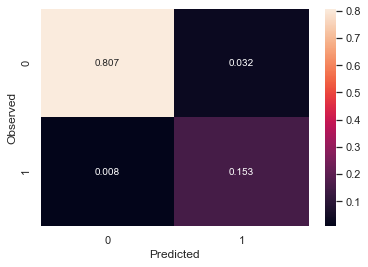

Precision: 0.8259325044404974
F1 Score: 0.884871550903901
Accuracy on training set :  0.9820823927765236
Accuracy on test set :  0.9601842711418229
Recall on training set :  1.0
Recall on test set :  0.9528688524590164
Precision on training set :  0.8996840442338072
Precision on test set :  0.8259325044404974


In [191]:
y_predict_xgb_tuned_random = xgb_tuned_random.predict(X_test)
print('Confusion Matrix (in probabilities instead of counts)')
draw_cm(y_test, y_predict_xgb_tuned_random)  # This makes the confusion matrix.
print("Precision:", precision_score(y_test, y_predict_xgb_tuned_random))
print("F1 Score:", f1_score(y_test, y_predict_xgb_tuned_random))
xgb_tuned_random_score = get_metrics_score(xgb_tuned_random)

##### Gradient Boosting Machine

In [176]:
%%time 

#Creating pipeline


pipe=make_pipeline(StandardScaler(), gbm)

param_grid={'gradientboostingclassifier__n_estimators':np.arange(50,300,50),
            'gradientboostingclassifier__learning_rate':[0.01,0.1,0.2],
            'gradientboostingclassifier__min_samples_split':np.linspace(0.1, 0.5, 3),
            'gradientboostingclassifier__min_samples_leaf':np.linspace(0.1, 0.5, 3),
            'gradientboostingclassifier__max_depth':[3,8],
            'gradientboostingclassifier__max_features':["log2", "sqrt"],
            'gradientboostingclassifier__subsample':[0.7,0.85,1]
           }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'gradientboostingclassifier__subsample': 1, 'gradientboostingclassifier__n_estimators': 250, 'gradientboostingclassifier__min_samples_split': 0.1, 'gradientboostingclassifier__min_samples_leaf': 0.1, 'gradientboostingclassifier__max_features': 'log2', 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__learning_rate': 0.2} with CV score=0.8569093438441919:
Wall time: 1min 54s


In [192]:
# Creating new pipeline with best parameters
gbm_tuned_random = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "GBM",
            GradientBoostingClassifier(
                random_state=1,
                max_depth=3,
                max_features='log2',
                min_samples_leaf=0.1,
                min_samples_split=0.1,
                n_estimators=250,
                subsample=1,
                learning_rate= 0.2                
            )
        )
    ]
)
# Fit the model on training data
gbm_tuned_random.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('GBM',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            max_features='log2',
                                            min_samples_leaf=0.1,
                                            min_samples_split=0.1,
                                            n_estimators=250, random_state=1,
                                            subsample=1))])

Confusion Matrix (in probabilities instead of counts)


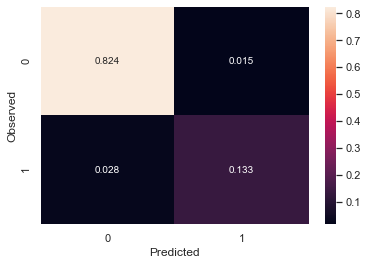

Precision: 0.8955555555555555
F1 Score: 0.8592750533049041
Accuracy on training set :  0.9757336343115124
Accuracy on test set :  0.9565646594274433
Recall on training set :  0.9025460930640913
Recall on test set :  0.8258196721311475
Precision on training set :  0.9439853076216712
Precision on test set :  0.8955555555555555


In [193]:
y_predict_gbm_tuned_random = gbm_tuned_random.predict(X_test)
print('Confusion Matrix (in probabilities instead of counts)')
draw_cm(y_test, y_predict_gbm_tuned_random)  # This makes the confusion matrix.
print("Precision:", precision_score(y_test, y_predict_gbm_tuned_random))
print("F1 Score:", f1_score(y_test, y_predict_gbm_tuned_random))
gbm_tuned_random_score = get_metrics_score(gbm_tuned_random)

##### Upsampled Logistic Regression

In [177]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), logreg_upsampled)

#Parameter grid to pass in GridSearchCV
param_grid={'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'logisticregression__penalty':['l1', 'l2', 'elasticnet', 'none'],
            'logisticregression__C':[100, 10, 1.0, 0.1, 0.01]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_upsampled,y_train_upsampled)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'logisticregression__solver': 'newton-cg', 'logisticregression__penalty': 'none', 'logisticregression__C': 10} with CV score=0.8742738407389868:
Wall time: 25.2 s


In [194]:
# Creating new pipeline with best parameters
logreg_upsampled_tuned_random = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "logreg_upsampled",
            LogisticRegression(
                random_state=1,
                C=10,
                penalty='none',
                solver='newton-cg'
            )
        )
    ]
)
# Fit the model on training data
logreg_upsampled_tuned_random.fit(X_train_upsampled, y_train_upsampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg_upsampled',
                 LogisticRegression(C=10, penalty='none', random_state=1,
                                    solver='newton-cg'))])

Confusion Matrix (in probabilities instead of counts)


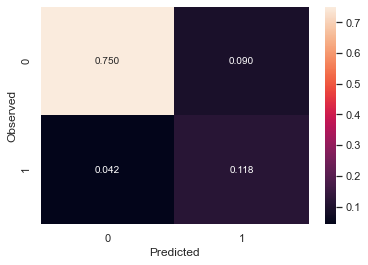

Precision: 0.569620253164557
F1 Score: 0.6428571428571429
Accuracy on training set :  0.8726015801354402
Accuracy on test set :  0.8683777558407371
Recall on training set :  0.7647058823529411
Recall on test set :  0.7377049180327869
Precision on training set :  0.5783532536520585
Precision on test set :  0.569620253164557


In [195]:
y_predict_logreg_upsampled_tuned_random = logreg_upsampled_tuned_random.predict(X_test)
print('Confusion Matrix (in probabilities instead of counts)')
draw_cm(y_test, y_predict_logreg_upsampled_tuned_random)  # This makes the confusion matrix.
print("Precision:", precision_score(y_test, y_predict_logreg_upsampled_tuned_random))
print("F1 Score:", f1_score(y_test, y_predict_logreg_upsampled_tuned_random))
logreg_upsampled_tuned_random_score = get_metrics_score(logreg_upsampled_tuned_random)

## Model Performances - 5 pts

### Compare the model performance of all the models

In [196]:
column_labels = ['train_accuracy', 'test_accuracy', 'train_recall', 'test_recall', 'train_precision', 'test_precision']
row_labels = ['logreg_score', 'logreg_downsampled_score', 'logreg_upsampled_score', 'logreg_irregular_score',
              'dtree_score', 'rf_score', 'bagging_classifier_score', 'xgb_score', 'adaboost_score', 'gbm_score',
              'logreg_upsampled_tuned_random_score', 'logreg_upsampled_tuned_grid_score', 'gbm_tuned_random_score',
              'gbm_tuned_grid_score', 'xgb_tuned_random_score', 'xgb_tuned_grid_score'
             ]

all_scores = pd.DataFrame(list(zip(logreg_score, logreg_downsampled_score, logreg_upsampled_score, logreg_irregular_score,
                                   dtree_score, rf_score, bagging_classifier_score, xgb_score, adaboost_score, gbm_score,
                                   logreg_upsampled_tuned_random_score, logreg_upsampled_tuned_grid_score, gbm_tuned_random_score,
                                   gbm_tuned_grid_score, xgb_tuned_random_score, xgb_tuned_grid_score)))
all_scores = all_scores.T
all_scores.columns = column_labels
all_scores.index = row_labels

In [202]:
print("\n\tHere are the model perforance scores of all the models.\n")
all_scores.sort_values(by='test_recall', ascending=False)


	Here are the model perforance scores of all the models.



train_accuracy  test_accuracy  \
xgb_tuned_grid_score                       0.954712       0.935176   
xgb_tuned_random_score                     0.982082       0.960184   
xgb_score                                  1.000000       0.971372   
gbm_tuned_grid_score                       0.979543       0.958539   
gbm_score                                  0.978414       0.962488   
gbm_tuned_random_score                     0.975734       0.956565   
logreg_upsampled_score                     0.806574       0.796973   
logreg_downsampled_score                   0.820683       0.815071   
rf_score                                   1.000000       0.960513   
adaboost_score                             0.965152       0.950971   
dtree_score                                1.000000       0.926621   
bagging_classifier_score                   0.995909       0.947680   
logreg_upsampled_tuned_random_score        0.872602       0.868378   
logreg_upsampled_tuned_grid_score          0.872602       0.868378   
logreg_irregular_score                     0.882195       0.881869   
logreg_score                               0.879656       0.880224   

                                     train_recall  test_recall  \
xgb_tuned_grid_score                     0.998244     0.956967   
xgb_tuned_random_score                   1.000000     0.952869   
xgb_score                                1.000000     0.877049   
gbm_tuned_grid_score                     0.918349     0.840164   
gbm_score                                0.898156     0.831967   
gbm_tuned_random_score                   0.902546     0.825820   
logreg_upsampled_score                   0.820896     0.823770   
logreg_downsampled_score                 0.821773     0.813525   
rf_score                                 1.000000     0.809426   
adaboost_score                           0.864794     0.797131   
dtree_score                              1.000000     0.776639   
bagging_classifier_score                 0.977173     0.768443   
logreg_upsampled_tuned_random_score      0.764706     0.737705   
logreg_upsampled_tuned_grid_score        0.764706     0.737705   
logreg_irregular_score                   0.453907     0.444672   
logreg_score                             0.438982     0.432377   

                                     train_precision  test_precision  
xgb_tuned_grid_score                        0.780907        0.726283  
xgb_tuned_random_score                      0.899684        0.825933  
xgb_score                                   1.000000        0.940659  
gbm_tuned_grid_score                        0.952641        0.895197  
gbm_score                                   0.965094        0.926941  
gbm_tuned_random_score                      0.943985        0.895556  
logreg_upsampled_score                      0.444814        0.430868  
logreg_downsampled_score                    0.467066        0.457373  
rf_score                                    1.000000        0.936019  
adaboost_score                              0.913729        0.886105  
dtree_score                                 1.000000        0.768763  
bagging_classifier_score                    0.997312        0.890736  
logreg_upsampled_tuned_random_score         0.578353        0.569620  
logreg_upsampled_tuned_grid_score           0.578353        0.569620  
logreg_irregular_score                      0.708219        0.711475  
logreg_score                                0.700280        0.708054

### Comments about model performance
- The top three models are all xgboost models.  Kind of interesting.
- The randomized search tuned GBM model performed worse than the "out-of-the-box" GBM.  Perhaps more iterations or a heftier set of parameters should have been used.
- The logistic regression upsampled model out of the box actually did better than either of its tuned counterparts.  That can happen with the randomized search tuning, but it probably should not have happened with the grid search.  At this point, since it has fallen to 7th, there isn't much point.  But, if it were ranked higher on the list, or if interpretability considerations forced me into using a logistic regression, I'd want to improve my tuning techniques there.

### Comment on the time taken by the grid and randomized search in optimization

### grid:
|model | wall time|
-------|----------|
|xgb |  1h36.25m |
|gbm |  20.5m |
| logreg_upsampled | 17.6s |

### random:
|model | wall time|
-------|----------|
| xgb  | 4m51s    |
| gbm  | 1m54s    |
| logreg_upsampled | 25.2s |

Comparing the time grid search took compared to random search (grid time / random time), we have
- for xgb, 19.84
- for gbm, 10.78
- for upsampled logistic regression, .698

Basically, there 10-20x improvements in speed for the more hypertunable models.  Which is great.<br>
And, for xgb, this huge time savings came at not much cost to performance.  0.956967 vs 0.952869  (grid vs random, test recall)

For gbm, the improvement drop was only 2%,  0.840164 vs 0.825820

For the upsampled logistic regression, the models came up with the same metrics (all but one of the parameters were the same.)

## Actionable Insights & Recommendations - 5 pts

### Business recommendations and insights

To get some business recommendations and insights, we'd like to know which features are the most important.

In [216]:
X_train_scaled = StandardScaler().fit_transform(X_train)

In [221]:
xgb_tuned_grid

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=250,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.7, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [223]:
# I took the parameters directly from the xgb_tuned_grid pipeline (and removed "missing=nan")
quick_xgb_tuned_grid = XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1,
                               monotone_constraints='()', n_estimators=250,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.7, tree_method='exact',
                               validate_parameters=1, verbosity=None)
quick_xgb_tuned_grid.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=10, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None)

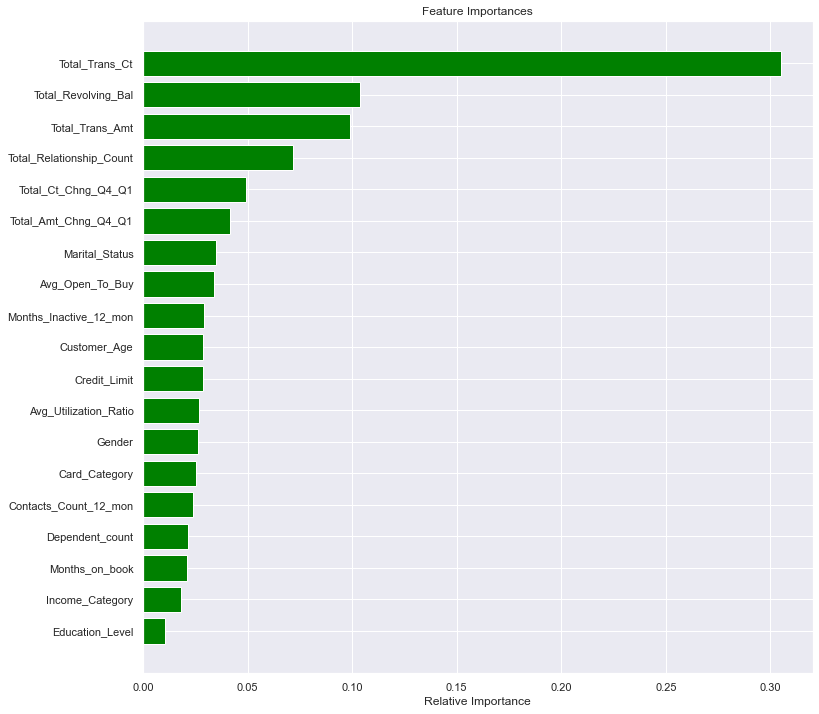

In [227]:
feature_names = X_train.columns
importances = quick_xgb_tuned_grid.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [233]:
#  Here is an alternative way to get the results directly from the pipeline.
#  I'm not 100% sure that I did it right, but it looks like it has the same values as the multi-step method above, so that's a good sign.
#  (Or, they are all wrong together!)

# https://towardsdatascience.com/extracting-feature-importances-from-scikit-learn-pipelines-18c79b4ae09a

#  I tried to follow the code template in the article above to directly get my feature importances from the pipeline.

eli5.explain_weights(xgb_tuned_grid.named_steps['XGB'], top=50, feature_names=X_train.columns.tolist())

Explanation(estimator="XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',\n              gamma=5, gpu_id=-1, importance_type='gain',\n              interaction_constraints='', learning_rate=0.01, max_delta_step=0,\n              max_depth=6, min_child_weight=1, missing=nan,\n              monotone_constraints='()', n_estimators=250, n_jobs=4,\n              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,\n              scale_pos_weight=10, subsample=0.7, tree_method='exact',\n              validate_parameters=1, verbosity=None)", description='\nXGBoost feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='Total_Trans_Ct', weight=0.3048601, std=None, value=None), FeatureWeight(feature='Total_Revolving_Bal', weight=0.10367206, std=None, value=None), FeatureWeight(feature='Total_Trans_Amt', weight=0.0990917, std=None, value=None), FeatureWeight(feature='Total_Relationship_Count', weight=0.071879394, std=None, value=None), FeatureWeight(feature='Total_Ct_Chng_Q4_Q1', weight=0.049244896, std=None, value=None), FeatureWeight(feature='Total_Amt_Chng_Q4_Q1', weight=0.04173501, std=None, value=None), FeatureWeight(feature='Marital_Status', weight=0.03511414, std=None, value=None), FeatureWeight(feature='Avg_Open_To_Buy', weight=0.03416745, std=None, value=None), FeatureWeight(feature='Months_Inactive_12_mon', weight=0.029277183, std=None, value=None), FeatureWeight(feature='Customer_Age', weight=0.028558876, std=None, value=None), FeatureWeight(feature='Credit_Limit', weight=0.028492654, std=None, value=None), FeatureWeight(feature='Avg_Utilization_Ratio', weight=0.026987312, std=None, value=None), FeatureWeight(feature='Gender', weight=0.026115965, std=None, value=None), FeatureWeight(feature='Card_Category', weight=0.025379859, std=None, value=None), FeatureWeight(feature='Contacts_Count_12_mon', weight=0.023795687, std=None, value=None), FeatureWeight(feature='Dependent_count', weight=0.02143198, std=None, value=None), FeatureWeight(feature='Months_on_book', weight=0.021164596, std=None, value=None), FeatureWeight(feature='Income_Category', weight=0.01826298, std=None, value=None), FeatureWeight(feature='Education_Level', weight=0.010768164, std=None, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

We'll revisit the bivariate analysis for the top three features in our model.
1. Total Transaction Count
2. Total Revolving Balance
3. Total Transaction Amount

Now considering the variable Total_Trans_Ct vs Attrition_Flag...

The mean Total_Trans_Ct of those who have Attrition_Flag is 44.93.
The mean Total_Trans_Ct of those who have not Attrition_Flag is 68.67.
This difference in means is significant.
	(p-value = 7.923757769771171e-290; t-stat = -40.251).


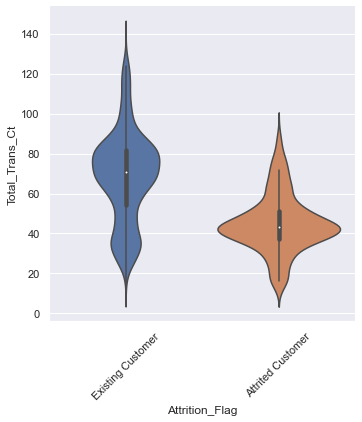

-------------------------------------------------------------------------------


Now considering the variable Total_Revolving_Bal vs Attrition_Flag...

The mean Total_Revolving_Bal of those who have Attrition_Flag is 672.82.
The mean Total_Revolving_Bal of those who have not Attrition_Flag is 1256.6.
This difference in means is significant.
	(p-value = 1.4233645880766252e-141; t-stat = -27.435).


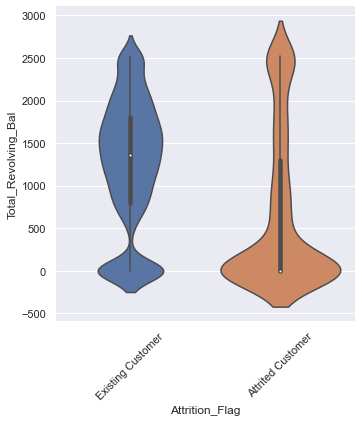

-------------------------------------------------------------------------------


Now considering the variable Total_Trans_Amt vs Attrition_Flag...

The mean Total_Trans_Amt of those who have Attrition_Flag is 3095.03.
The mean Total_Trans_Amt of those who have not Attrition_Flag is 4654.66.
This difference in means is significant.
	(p-value = 1.2955174910905131e-63; t-stat = -17.211).


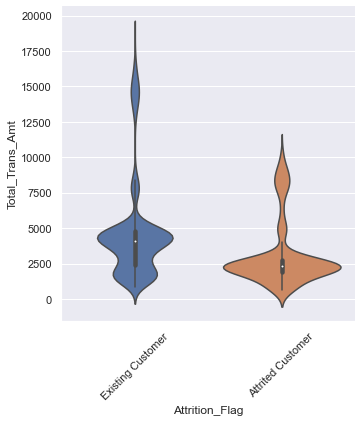

-------------------------------------------------------------------------------




In [236]:
# Taking this from the EDA at the top of the code, but just looking at the top 3.
for x_var in ['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Trans_Amt']:
    my_bivariate_analysis_function(x_var)

It's good that these three ended up being the top three features of our model.  They stuck out pretty early on using the eyeball test and the t-test.

Here is how these top three variables are related.


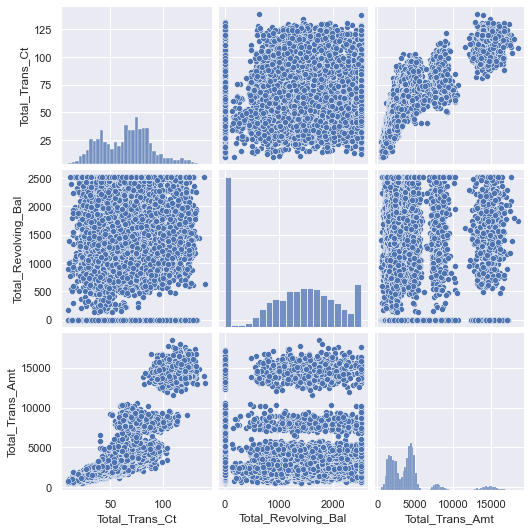

In [241]:
print("Here is how these top three variables are related.")
sns.pairplot(df[['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Trans_Amt']]);

### Business Recommendation:
- Reach out to customers with lower transaction counts with marketing offers to encourage them to stay.
- Alternatively, encouraging them to have more transactions might get them more invested and excited in our product.  (Maybe like how Chase Freedom's quarterly, opt-in only rewards encourage targeted spending.  (Gas, restaurants, groceries, are common quarterly reward categories)
- We should do similar outreach regarding revolving balances and 

The Chase Freedom 5% bonus categories for 2019 were as follows:<br>
<br>
1st quarter (January 1, 2019 – March 31, 2019) – Gas Stations, Tolls, Drugstores.<br>
2nd quarter (April 1, 2019 – June 30, 2019) – Grocery Stores (not including Walmart and Target Purchases) and Home Improvement Stores.<br>
3rd quarter (July 1, 2019 – September 30, 2019) – Gas stations and streaming services.<br>
4th quarter (October 1, 2019 – December 31, 2019) – PayPal, Chase Pay & Department Stores.<br>
<br>
(source:  https://thetravelsisters.com/chase-freedom-categories-2019-calendar/)

## Notebook:  Overall quality - 4 pts

### Structure and flow

I built my structure around the posted rubric.  A few sections did not seem relevant or seemed redundant.  A few places, like outlier treatment, I put off for later and then never returned.  But in general, I proceeded in the order that was suggested by the rubric.<br>
When I was finished, I did not re-run the code from end-to-end due to time constraints.  So, apologies for the out of order numbers and the gaps.

### Well-commented code

I hope I have provided enough comments to make the work understandable and replicable.

#### **Scoring guide (Rubric) - CreditCard Users Churn Prediction**
<br>

| <u> Criteria </u>  | <u> Points </u> |
|-----------| ---------|
|  <center><b> Perform an Exploratory Data Analysis on the data </b></b></center>|  |
| Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Any other exploratory deep dive |	6 |
| <center><b> Illustrate the insights based on EDA </b></center>| |
| Key meaningful observations on the relationship between variables | 5 |
| <center><b> Data Pre-processing </b></center>| |
| Prepare the data for analysis - Missing value Treatment, Outlier Detection(treat, if needed- why or why not), Feature Engineering, Prepare data for modeling | 5 |
| <center><b> Model building - Logistic Regression </b></center>| |
| Make a logistic regression model - Improve model performance by up and downsampling the data - Regularize above models, if required | 6 |
| <center><b> Model building - Bagging and Boosting </b></center>| |
| Build Decision tree, random forest, bagging classifier models - Build Xgboost, AdaBoost, and gradient boosting models | 8 |
| <center><b> Hyperparameter tuning using grid search </b></center>| |
| Tune the best 3 models using grid search and provide the reason behind choosing those models - Use pipelines in hyperparameter tuning | 8 |
| <center><b> Hyperparameter tuning using random search </b></center>| |
| Tune the best 3 models using random search and provide the reason behind choosing those models - Use pipelines in hyperparameter tuning | 8 |
| <center><b> Model Performances </b></center>| |
| Compare the model performance of all the models - Comment on the time taken by the grid and randomized search in optimization | 5 |
| <center><b> Actionable Insights & Recommendations </b></center>| |
| Business recommendations and insights | 5 |
| <center><b> Notebook - Overall quality </b></center>| |
| Structure and flow - Well commented code | 4 |
| Points | 60 |